In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz
from pathlib import Path

In [4]:
segment_id = 864691135567721964
cell_type = "MC"

# Load the appropriate volume data inferface object

In [5]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [6]:
synapse_filepath = str(Path(f'./{segment_id}_synapses.csv').absolute())
synapse_filepath

'/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/864691135567721964_synapses.csv'

In [7]:
from datasci_tools import pandas_utils as pu
df = pu.csv_to_df(synapse_filepath)
df

,segment_id,segment_id_secondary,synapse_id,prepost,synapse_x,synapse_y,synapse_z,synapse_size
0,864691135567721964,864691131808917685,126350506,postsyn,159015,163866,21373,4248
1,864691135567721964,864691131817266592,133926944,postsyn,162210,185292,22676,3708
2,864691135567721964,864691132002312394,133375145,postsyn,161962,212462,22829,7716
3,864691135567721964,864691132049643177,73532781,postsyn,128892,207884,23301,11496
4,864691135567721964,864691132146704984,167829877,postsyn,180030,206188,22035,5436
...,...,...,...,...,...,...,...,...
6348,864691135567721964,864691137197144897,82142719,presyn,121331,188683,24233,1504
6349,864691135567721964,864691137197151297,104203877,presyn,142890,172428,24107,4528
6350,864691135567721964,864691137197151297,104205943,presyn,144197,172298,24104,4228
6351,864691135567721964,864691137197153345,147748365,postsyn,170630,207400,22377,7020


In [8]:
vdi.set_synapse_filepath(
    synapse_filepath
)

# Data Prep: Loading mesh

In [9]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(451453, 3), faces.shape=(899885, 3))>

In [10]:
from datasci_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [11]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [12]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [13]:
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

xvfb-run -n 3512 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_22836.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_22836_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/decimation_meshlab_25709018.mls


In [14]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
}



# Step 2: Soma Identification

In [15]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [16]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [17]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [18]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 5198 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_29464.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_29464_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_389298.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_29464.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_29464_remove_interior.off
/neurd_packages/NEURD/Applicati

  0%|          | 0/9 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.846587]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6173 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_613484.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_613484_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_878212.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_613484.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_613484_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_878212.mls is being deleted....
Inside sp

  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(278, 3), faces.shape=(550, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(278, 3), faces.shape=(550, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(234, 3), faces.shape=(462, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(234, 3), faces.shape=(462, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #2: <trimesh.Trimesh(vertices.shape=(2045, 3), faces.shape=(4086, 3))>
xvfb-run -n 9943 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/decimation_meshlab_25888949.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(512, 3), faces.shape=(1020, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(512, 3), faces.shape=(1020

  0%|          | 0/4 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #3: <trimesh.Trimesh(vertices.shape=(1777, 3), faces.shape=(3550, 3))>
xvfb-run -n 5511 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/decimation_meshlab_25888949.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(445, 3), faces.shape=(886, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(445, 3), faces.shape=(886, 

  0%|          | 0/6 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #4: <trimesh.Trimesh(vertices.shape=(1773, 3), faces.shape=(3542, 3))>
xvfb-run -n 1105 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/decimation_meshlab_25888949.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(444, 3), faces.shape=(884, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(444, 3), faces.shape=(884, 

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.587199]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_559000.mls is being deleted....
Inside sphere validater: ratio_val = 108.49296057185164
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(356, 3), faces.shape=(706, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/909_mesh 
clusters:3 
smoothness:0.2

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry



 Total time for run = 148.59165406227112
Before Filtering the number of somas found = 1

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 4461 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_89168.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_89168_fill_holes.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/fill_holes_57822.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_89168.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_89168_fill_holes.off
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/

  0%|          | 0/12 [00:00<?, ?it/s]

Largest hole before segmentation = 60920.9840611568, after = 330805.80253342,

ratio = 5.430079760388205, difference = 269884.81847226317
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
Not need to do a second pass because already found a soma


In [19]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 1
# of glia = 0
# of nuclei = 1


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [20]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [21]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':148.59164786338806,
    'soma_sdfs':array([0.846587]),
  },
}



# Step 2b: Saving off pipeline products

In [22]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/products_up_to_soma_stage.pkl
File size is 16.487003 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:140015615792704
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:140015253849184


# Step 3: Decomposition

In [23]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
soma_mesh_list_centers = [array([607290.85387328, 771034.57102043, 909995.31979156])]
Getting Glia and Nuclei Pieces Subtracted Away 0.3177196979522705
 Splitting mesh after soma cancellation 1.199852705001831
# of split_meshes = 4
 Containing Mesh Indices 0.057614803314208984
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 0.00010442733764648438
There were 3 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 0.8970420360565186
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh pieces-----
soma_containing_meshes = {0: [0]}

-

  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/166759 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.15s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 14.968456506729126
branches_touching_root = [7]
combining close nodes
combine_threshold = 700
length of Graph = 36933
After combining close endpoints max(kept_branches_idx) = 136, len(kept_branches_idx) = 134
empty_indices % = 0.0
 conflict_indices % = 0.009613302211420458


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Decomposing first pass: 26.328296661376953
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [149]
mesh_large_connectivity: 0.00019669532775878906
Finding MAP candidates connected components: 8.130073547363281e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.4557113647460938e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.03992724418640137
sbv[0].reshape(-1,3) = [[606217.5 761733.  911841. ]]
closest_sk_pt_coord BEFORE = [606963.3196656  761263.13124606 911832.19073545]
current_skeleton.shape = (318, 2, 3)
node_for_stitch = 318: [606963.3196656  761263.13124606 911832.19073545]
node_for_stitch AFTER = 318: [606963.3196656  761263.13124606 9

  0%|          | 0/134 [00:00<?, ?it/s]

332471 332472
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [610836.9 779075.4 906316.1]
Time for preparing soma vertices and root: 0.00026106834411621094
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/71107 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.32it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.435201644897461
connecting at the root
branches_touching_root = [12]
combining close nodes
combine_threshold = 700
length of Graph = 8858
After combining close endpoints max(kept_branches_idx) = 12, len(kept_branches_idx) = 13
empty_indices % = 0.0
 conflict_indices % = 0.0034268549791638754


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Decomposing first pass: 10.198742151260376
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6892, 5362, 1962, 9759, 5273]
mesh_large_connectivity: 0.027561187744140625
Finding MAP candidates connected components: 0.00011157989501953125
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.4198286533355713
Grouping MP Sublimbs by Graph: 0.06201434135437012
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0035431385040283203
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 802 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_pac

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.051297664642333984
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 19.24018096923828
Checking connected components after removing cycles
Total time for mesh KDTree = 0.18512988090515137
sbv[0].reshape(-1,3) = [[610836.9 779075.4 906316.1]]
closest_sk_pt_coord BEFORE = [609974. 779345. 906973.]
current_skeleton.shape = (1066, 2, 3)
node_for_stitch = 142: [609974. 779345. 906973.]
node_for_stitch AFTER = 142: [609974. 779345. 906973.]
possible_node_loc = [   0  143  182  221  517  590  627  638  838 1028 1066]
possible_node_loc AFTER = [   0  143  182  221  517  590  627  638  838 1028 1066]
curr_shortest_path = [142, 143.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 50.89204259999789
Changing the stitch point becasue the distance to end or branch node was 50.89204259999789
New stitch point ha

  0%|          | 0/7 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1040, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 22.03097629547119
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4647 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_46924.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_46924_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_990855.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_46924.off
removed temporary outp

0it [00:00, ?it/s]

Total time for decomposition = 4.435867071151733
mesh_correspondence_first_pass: 4.435915470123291
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1040, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1040, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.041712253829321665
 conflict_indices % = 0.016137855579868708


  0%|          | 0/39 [00:00<?, ?it/s]

Took 1 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.001299234135667396


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 28.878663778305054
correspondence_1_to_1: 2.407926082611084
Total time for MAP sublimb processing 28.878730058670044
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.017541170120239258
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.00991201400756836
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.010040283203125
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.00800466537475586
Do Not Need to Fix MP Decomposition 3 so just continuing
Successful mesh connectivity with type e

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08658529003378028
 conflict_indices % = 0.0057198516154435995


  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [636853.01257571 785085.62792771 883118.75733574]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.02859952470703925
 conflict_indices % = 0.005326559042858314


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0673532777505313
 conflict_indices % = 0.005721759032205329


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [601813.99441567 798147.85467095 910184.83951148]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05072991302348749
 conflict_indices % = 0.006551975171462508


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [613686.55938768 782177.87252093 905912.75140531]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.08049921996879875
 conflict_indices % = 0.0171606864274571


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0981169474727453
 conflict_indices % = 0.01313181367690783


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 



Time for decomp of Limb = 78.8093581199646
Number of matching vertices = 52
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/15 [00:00<?, ?it/s]

141820 141821
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [607542.6 762831.9 914440.2]
Time for preparing soma vertices and root: 0.0002200603485107422
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62628 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.1473045349121094
connecting at the root
branches_touching_root = [10]
combining close nodes
combine_threshold = 700
length of Graph = 7808
After combining close endpoints max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.003281260003841475


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Decomposing first pass: 8.63387155532837
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [4232, 2486, 12102, 20209, 18378]
mesh_large_connectivity: 0.05425763130187988
Finding MAP candidates connected components: 0.00015878677368164062
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.26957035064697266
Grouping MP Sublimbs by Graph: 0.057768821716308594
Divinding into MP and MAP pieces: 1.6689300537109375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.02492976188659668
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4296 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_pa

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.11164522171020508
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 40.497764110565186
Checking connected components after removing cycles
Total time for mesh KDTree = 0.3707754611968994
sbv[0].reshape(-1,3) = [[607542.6 762831.9 914440.2]]
closest_sk_pt_coord BEFORE = [608035. 762744. 915041.]
current_skeleton.shape = (2635, 2, 3)
node_for_stitch = 912: [608035. 762744. 915041.]
node_for_stitch AFTER = 912: [608035. 762744. 915041.]
possible_node_loc = [  68  120  125  203  257  332  456  484  507  520  533  572  842  912
 1270 1315 1570 1651 1819 1841 1870 2112 2271 2492 2493 2523 2580 2635]
possible_node_loc AFTER = [  68  120  125  203  257  332  456  484  507  520  533  572  842  912
 1270 1315 1570 1651 1819 1841 1870 2112 2271 2492 2493 2523 2580 2635]
curr_shortest_path = [912]
Current stitch point was a branch or endpoint

  0%|          | 0/24 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2498, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 48.52035617828369
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2449 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_1143.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_1143_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_615081.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_1143.off
removed temporary output 

0it [00:00, ?it/s]

Total time for decomposition = 10.916837692260742
mesh_correspondence_first_pass: 10.916897773742676
Limb decomposed into 9 branches
divided_skeleton_graph_recovered = (2498, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2498, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.059853327991359936
 conflict_indices % = 0.01783754594387444


  0%|          | 0/75 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 64.23091197013855
correspondence_1_to_1: 4.768654823303223
Total time for MAP sublimb processing 64.2309889793396
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.017803668975830078
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.023463726043701172
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.023978471755981445
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [638960.43191541 756081.88315311 949436.48435953]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_wit

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06662979194145428
 conflict_indices % = 0.006190699059694507


  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [613101.64672925 779430.00572369 978255.72967205]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07104678891538525
 conflict_indices % = 0.007441822218567552


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [619621.55666018 680458.4761976  936121.64033632]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09228290886775084
 conflict_indices % = 0.006788892298250997


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 100.32318878173828
Number of matching vertices = 27
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/15 [00:00<?, ?it/s]

124951 124952
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [612977.6 770342.8 904385.2]
Time for preparing soma vertices and root: 0.00032782554626464844
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50407 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.43it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.498582363128662
connecting at the root
branches_touching_root = [18]
combining close nodes
combine_threshold = 700
length of Graph = 7941
After combining close endpoints max(kept_branches_idx) = 18, len(kept_branches_idx) = 19
empty_indices % = 0.0
 conflict_indices % = 0.0052689134108758326


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Decomposing first pass: 9.911651134490967
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [13210, 377, 1465, 1118, 9471, 6179]
mesh_large_connectivity: 0.037935733795166016
Finding MAP candidates connected components: 0.00019741058349609375
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.33424997329711914
Grouping MP Sublimbs by Graph: 0.045172691345214844
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.005701303482055664
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 5317 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /ne

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.08307504653930664
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 25.769775867462158
Checking connected components after removing cycles
Total time for mesh KDTree = 0.2654728889465332
sbv[0].reshape(-1,3) = [[612977.6 770342.8 904385.2]]
closest_sk_pt_coord BEFORE = [612746. 769999. 904054.]
current_skeleton.shape = (1299, 2, 3)
node_for_stitch = 0: [612746. 769999. 904054.]
node_for_stitch AFTER = 0: [612746. 769999. 904054.]
possible_node_loc = [   0   30   97  217  348  424  450  718 1073 1118 1150 1212 1238 1299]
possible_node_loc AFTER = [   0   30   97  217  348  424  450  718 1073 1118 1150 1212 1238 1299]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [612746. 769999. 904054.]
skipping soma 0 because closest skelet

  0%|          | 0/10 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1217, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 28.069538354873657
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5336 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_29824.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_29824_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_465252.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_29824.off
removed temporary out

0it [00:00, ?it/s]

Total time for decomposition = 6.134060621261597
mesh_correspondence_first_pass: 6.134106874465942
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1217, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1217, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.06112507856693903
 conflict_indices % = 0.023035826524198617


  0%|          | 0/39 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 36.17569041252136
correspondence_1_to_1: 1.9662752151489258
Total time for MAP sublimb processing 36.17575716972351
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.016042232513427734
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.022028207778930664
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [627667.0685465  752448.21024514 890230.26052172]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0550491786394768
 conflict_indices % = 0.009475256192388898


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [4]
conn = [4]
winning_vertex = [629663.72297337 762149.95797074 895035.22026077]
MP_branches_with_stitch_point = [4]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.10659413364698964
 conflict_indices % = 0.0026464750422700873


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09878003236648823
 conflict_indices % = 0.013569027760487988


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [4]
MP_branches_for_correspondence = [4]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 63.593914270401
Number of matching vertices = 28
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/19 [00:00<?, ?it/s]

100589 100590
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [600586.1 766173.1 909408.5]
Time for preparing soma vertices and root: 0.0002148151397705078
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/37990 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.19it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.7010893821716309
branches_touching_root = [3]
combining close nodes
combine_threshold = 700
length of Graph = 5157
After combining close endpoints max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.005621387664616928


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Decomposing first pass: 5.857569694519043
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2983, 1364, 4759]
mesh_large_connectivity: 0.0058095455169677734
Finding MAP candidates connected components: 0.0001289844512939453
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.22163128852844238
Grouping MP Sublimbs by Graph: 0.04949808120727539
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.012938737869262695
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7852 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_packages/NEURD/

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.023981809616088867
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.678542613983154
Checking connected components after removing cycles
Total time for mesh KDTree = 0.10213494300842285
sbv[0].reshape(-1,3) = [[600586.1 766173.1 909408.5]]
closest_sk_pt_coord BEFORE = [600191. 766341. 909643.]
current_skeleton.shape = (353, 2, 3)
node_for_stitch = 353: [600191. 766341. 909643.]
node_for_stitch AFTER = 353: [600191. 766341. 909643.]
possible_node_loc = [  0 353]
possible_node_loc AFTER = [  0 353]
curr_shortest_path = [353]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [600191. 766341. 909643.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[600191., 766341., 909643.]])}
    Total time for Fixin

0it [00:00, ?it/s]

Total time for decomposition = 1.8599300384521484
mesh_correspondence_first_pass: 1.860107183456421
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (353, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (353, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.024928618493301122
 conflict_indices % = 0.0


  0%|          | 0/14 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 16.12039279937744
correspondence_1_to_1: 0.8968143463134766
Total time for MAP sublimb processing 16.12063694000244
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.02067112922668457
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.05160784721374512
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.07212114334106445
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [2]
conn = [2]
winning_vertex = [588932.63554664 766332.0624331  905632.93879231]
MP_branches_with_stitch_point = [2]
MAP_branches_with_stitch_p

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.03733801888864485
 conflict_indices % = 0.0016472655392049198


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06246861504469218
 conflict_indices % = 0.0018077734257306419


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [2]
MP_branches_for_correspondence = [2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [585324.42156918 761913.547466   900224.52736136]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.04123386842933585
 conflict_indices % = 0.004091910607491344


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.060183968462549274
 conflict_indices % = 0.012943495400788436


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [575389.03340603 737674.04893041 895030.74819376]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06982519512352447
 conflict_indices % = 0.009611043023930852


  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 43.33977723121643
Number of matching vertices = 21
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/11 [00:00<?, ?it/s]

75781 75782
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [610476.4 763192.8 908818.7]
Time for preparing soma vertices and root: 0.0002923011779785156
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/27114 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.35it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.49308276176452637
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 3511
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.003035182203468251


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Decomposing first pass: 4.3801960945129395
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [980, 2839]
mesh_large_connectivity: 0.0021724700927734375
Finding MAP candidates connected components: 9.036064147949219e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.16906499862670898
Grouping MP Sublimbs by Graph: 0.03143787384033203
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.015913009643554688
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4206 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_packages/NEURD/Applicati

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.019631624221801758
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 8.374894857406616
Checking connected components after removing cycles
Total time for mesh KDTree = 0.0604093074798584
sbv[0].reshape(-1,3) = [[610476.4 763192.8 908818.7]]
closest_sk_pt_coord BEFORE = [610937. 763008. 909075.]
current_skeleton.shape = (134, 2, 3)
node_for_stitch = 0: [610937. 763008. 909075.]
node_for_stitch AFTER = 0: [610937. 763008. 909075.]
possible_node_loc = [  0 134]
possible_node_loc AFTER = [  0 134]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [610937. 763008. 909075.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[610937., 763008., 909075.]])}
    Total time for Fixing Skelet

0it [00:00, ?it/s]

Total time for decomposition = 1.123971939086914
mesh_correspondence_first_pass: 1.1239986419677734
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (134, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (134, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.025399319193506152
 conflict_indices % = 0.0


  0%|          | 0/5 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 10.13083553314209
correspondence_1_to_1: 0.27946043014526367
Total time for MAP sublimb processing 10.130947589874268
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.019797801971435547
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.016881465911865234
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [625541.26641918 751740.4911113  912025.85771601]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08039975843057802
 conflict_indices % = 0.005318423564707487


  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [620994.00848407 753206.95466875 910936.33342788]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.05466564963132469
 conflict_indices % = 0.013221459445715738


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05817633760361718
 conflict_indices % = 0.01492087415222306


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 31.346587419509888
Number of matching vertices = 24
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

54032 54033
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [602191.8 777465.4 910208.8]
Time for preparing soma vertices and root: 0.00031256675720214844
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/14121 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.79it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.40317440032958984
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 1591
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 1.469841480255127
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [28180]
mesh_large_connectivity: 0.00015544891357421875
Finding MAP candidates connected components: 6.985664367675781e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.007994651794433594
Grouping MP Sublimbs by Graph: 2.8371810913085938e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.007380962371826172
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2520 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_packages/NEURD/Applica

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.05109548568725586
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 21.47956418991089
Checking connected components after removing cycles
Total time for mesh KDTree = 0.1898820400238037
sbv[0].reshape(-1,3) = [[602191.8 777465.4 910208.8]]
closest_sk_pt_coord BEFORE = [601939. 777371. 910126.]
current_skeleton.shape = (1265, 2, 3)
node_for_stitch = 1265: [601939. 777371. 910126.]
node_for_stitch AFTER = 1265: [601939. 777371. 910126.]
possible_node_loc = [   0   59   77  121  135  170  177  179  247  278  300  360  396  429
  467  484  565  616  722  937 1094 1097 1265]
possible_node_loc AFTER = [   0   59   77  121  135  170  177  179  247  278  300  360  396  429
  467  484  565  616  722  937 1094 1097 1265]
curr_shortest_path = [1265]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces 

  0%|          | 0/21 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1159, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 25.136008977890015
Working on limb correspondence for #0 MAP piece
xvfb-run -n 887 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_14774.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_14774_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_772322.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_14774.off
removed temporary outp

0it [00:00, ?it/s]

Total time for decomposition = 5.110105991363525
mesh_correspondence_first_pass: 5.11014199256897
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (1159, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1159, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.04730305180979418
 conflict_indices % = 0.0


  0%|          | 0/33 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 33.2651686668396
correspondence_1_to_1: 3.0113108158111572
Total time for MAP sublimb processing 33.26526737213135
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 35.23141956329346
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

28179 28180
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 473.354204416275


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(400, 3), faces.shape=(796, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.152557373046875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.61it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03349614143371582
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 126
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [137.60832097]
width_median= 137.608320973874
segment_widths_median = [137.60832097]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.61it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12454032897949219
branches_touching_root = [1]
combining close nodes
combine_threshold = 1300


length of Graph = 168
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.03391959798994975


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [141.07705943 136.46396301 214.44395318]
width_median= 148.41445093001497
segment_widths_median = [141.07705943 136.46396301 214.44395318]
Using the axon parameters
Decomposing first pass: 0.14211177825927734
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.532669067382812e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0994415283203125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.3098733425140381
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

795 796
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.5969996452331543
Floating 1: <trimesh.Trimesh(vertices.shape=(63, 3), faces.shape=(120, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 50.76it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04310345649719238
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [151.67460568]
width_median= 151.67460567958517
segment_widths_median = [151.67460568]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.79it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07604742050170898
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [151.67371775]
width_median= 151.67371774934747
segment_widths_median = [151.67371775]
Using the axon parameters
Decomposing first pass: 0.04191398620605469
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.076957702636719e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.6716461181640625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.16353964805603027
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

119 120
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2699556350708008
Floating 2: <trimesh.Trimesh(vertices.shape=(60, 3), faces.shape=(115, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 96.14it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.021724700927734375
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [316.70087961]
width_median= 316.70087960511967
segment_widths_median = [316.70087961]
Decomposing first pass: 0.03431534767150879
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.4080276489257812e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.056920766830444336


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.09976911544799805


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.04441018865154518
 conflict_indices % = 0.0033032371724289805


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 4
Total time for stitching floating pieces = 12.13948106765747
Total time for Concept Networks = 17.022706031799316
Total time for all mesh and skeletonization decomp = 514.8841361999512
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 7682 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_958176.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_958176_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_877289.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_958176.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_t

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 72



  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 82



  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 40



  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 30



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 60



  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 39



  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 72



  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 39



  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 28



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 57



  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 45



  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 84



  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 28



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 32



  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 79



  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 51



  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 145



  0%|          | 0/145 [00:00<?, ?it/s]

  0%|          | 0/145 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 28



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 32



  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 91



  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 123



  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 122



  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 38



  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 189



  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 35



  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 111



  0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/111 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 139



  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 92



  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 63



  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 63



  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 61



  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 32



  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 135



  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 127



  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 40



  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 96



  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 61



  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 66



  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 164



  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 112



  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 71



  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 49



  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 44



  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 103



  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 171



  0%|          | 0/171 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 112



  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 142



  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 122
    No spines and using precomputed width: 268.3987974668497
Working on limb L0 branch 105
    No spines and using precomputed width: 254.40528708461596
Working on limb L0 branch 123
    No spines and using precomputed width: 175.92980853069895
Working on limb L0 branch 92
    No spines and using precomputed width: 162.59099336271294
Working on limb L0 branch 106
    No spines and using precomputed width: 177.75531525200904
Working on limb L0 branch 91
    No spines and using precomputed width: 260.8307902249482
Working on limb L0 branch 93
    No spines and using precomputed width: 143.67443926531143
Working on limb L0 branch 78
    No spines and using precomputed width: 173.39493447310736
Working on limb L0 branch 82
    cur

In [24]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [25]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [26]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':148.59164786338806,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Saving off neuron

In [27]:
vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.15998196601867676
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.8828623294830322
Total time for limb_meshes compression = 1.4841840267181396
    Starting Limb Correspondence Compression


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 23.084360599517822
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:140015615792704
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:140015253849184
Total time for compression = 78.7976610660553


---Finished outputing neuron at location: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/864691135567721964---
saved neuron filepath = 864691135567721964


'864691135567721964.pbz2'

# Reloading the Neuron

In [28]:
neuron_obj_rec = vdi.load_neuron_obj(
    segment_id = segment_id,
    #mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


In [29]:
print(neuron_obj_rec.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':148.59164786338806,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

In [30]:
neuron_obj = neuron_obj_rec

# Step 4A: Multi Soma Split Suggestions

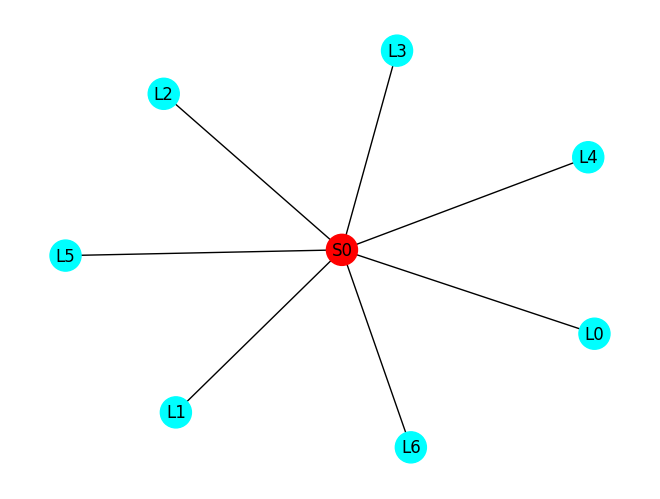

In [31]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [32]:
multi_soma_split_parameters = dict()

In [33]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


In [34]:
neuron_obj.pipeline_products.multi_soma_split_suggestions.multi_soma_split_parameters = multi_soma_split_parameters

# Step 4B: Multi Soma Split Execution

In [35]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

No error limbs to processs so just returning the original neuron


In [36]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':148.59164786338806,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Step 5: Cell Typing

In [37]:
from neurd import neuron_pipeline_utils as npu

In [38]:
neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 3


Number of segments: 3


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 4


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segme

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:20<00:00, 20.67s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 22.199188232421875
branches_touching_root = [15]
combining close nodes
combine_threshold = 1300
length of Graph = 47118
After combining close endpoints max(kept_branches_idx) = 490, len(kept_branches_idx) = 449
empty_indices % = 0.0
 conflict_indices % = 0.028083451415478307
Decomposing first pass: 80.3332929611206
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.5020370483398438e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.552436828613281e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.003998994827270508
sbv[0].reshape(-1,3) = [[606217.5 761733.  911841. ]]
closest_sk_pt_coord BEFORE = [607085.45171222 761489.43217667 911789.29988978]
curren

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 382.03it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.013643980026245117
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
Decomposing first pass: 0.022297143936157227
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.198883056640625e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9311904907226562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.03715634346008301
Removed 0 skeletal branches
119 120
For marked faces: None
empty_indices % = 0.0
 c

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.10214853286743164
concept_network_dict = {0: [<datasci_tools.networkx_utils.GraphOrderedEdges object at 0x7f5613c61730>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [607212.4 761727.8 911846.2]---------
Starting_edge inside branches_to_conept = [[606459.1 760534.7 912002.4]
 [607212.4 761727.8 911846.2]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [435]
printing out current edge:
[[607212.4 761727.8 911846.2]
 [606459.1 760534.7 912002.4]]
edge_endpoints_to_process was empty so exiting loop after 450 iterations
starting_node in concept map (that should match the starting edge) = 440
Total time for branches to concept conversion = 3.9834787845611572

Done generating concept network 



Number of segments: 5


Number of segments: 6


Number of segments: 17


Number of segments: 1


Number of segments: 2


Number of segments: 4


Number of segments: 5


Number of segm

In [ ]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh


# Autoproofreading Stage

Current node skip distance was 1413.9980035990218 but max skip distance was 1413.9980035990218
Current node skip distance was 1433.1561119629346 but max skip distance was 1433.1561119629346
Current node skip distance was 1450.6088010079347 but max skip distance was 2278.595950719559
Current node skip distance was 1827.2255127315534 but max skip distance was 1827.2255127315534
Current node skip distance was 1682.1335310612171 but max skip distance was 1716.5195349280298
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0020034313201904297
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   9  11     49.54   26.087316               0.263101              0.000228   
1   9  13    102.78    1.883702           

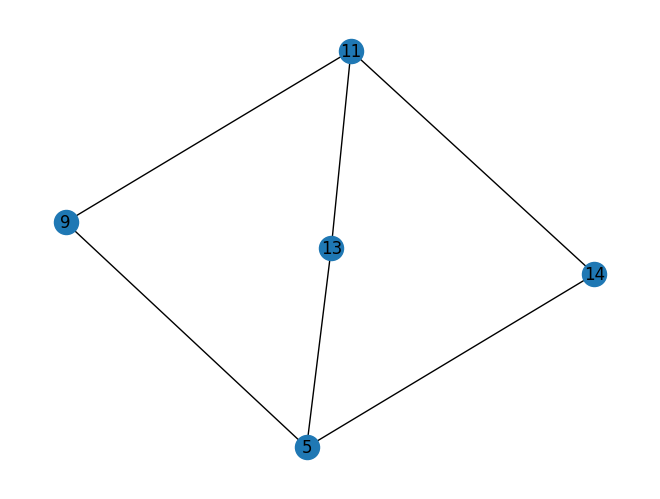

Performing global features query
Done with edge_df: 0.00087738037109375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   9  11     49.54   26.087316               0.263101              0.000228   
1   9   5     62.37   24.558780               0.198516              0.000000   
2  11  13     27.84   24.203613               0.331257              0.000228   
3  11  14     56.20    3.728196               0.051025              0.000082   
4  13   5     19.26   26.442483               0.213742              0.000000   
5  14   5     48.78   46.917900               0.379251              0.000146   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       None                          None  
1                0                       None                          None  
2       

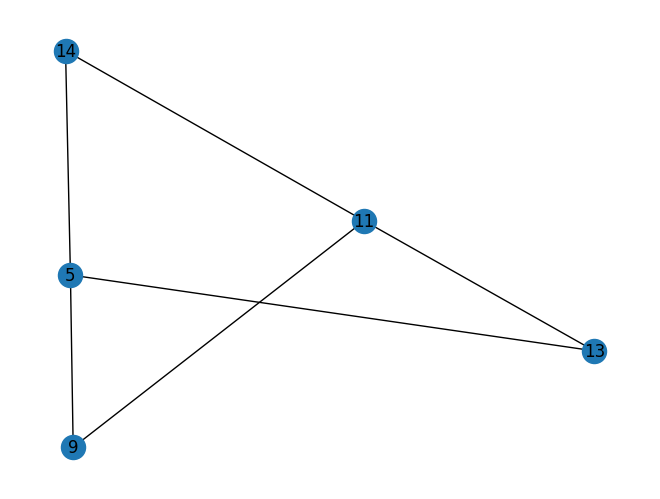

Performing node features query
Done with edge_df: 0.0009274482727050781
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   9  11     49.54   26.087316               0.263101              0.000228   
1   9   5     62.37   24.558780               0.198516              0.000000   
2  11  13     27.84   24.203613               0.331257              0.000228   
3  11  14     56.20    3.728196               0.051025              0.000082   
4  13   5     19.26   26.442483               0.213742              0.000000   
5  14   5     48.78   46.917900               0.379251              0.000146   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                       None                          None   
1                0                       None                          None   
2      

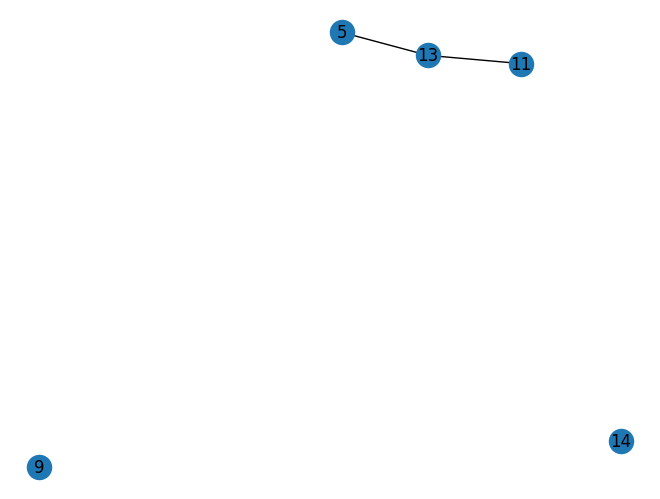

for upstream node 5, winning_node = None, error_branches = [ 9 11 13 14]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2295.817206442129 but max skip distance was 2295.817206442129
Current node skip distance was 1402.1861648657755 but max skip distance was 1402.1861648657755
Current node skip distance was 1579.8052800640987 but max skip distance was 1579.8052800640987
Current node skip distance was 1546.9734240260361 but max skip distance was 1546.9734240260361
Current node skip distance was 1471.108130620547 but max skip distance was 1658.6592923019962
Current node skip distance was 1571.9565201568016 but max skip distance was 1571.9565201568016
Current node skip distance was 1486.6422825420861 but max skip distance was 1486.6422825420861
Current node skip distance was 1817.724537011968 but max skip distance was 2295.817206442129
Current node skip distance was 1501.0959360356467 but max skip distance was 1501.09

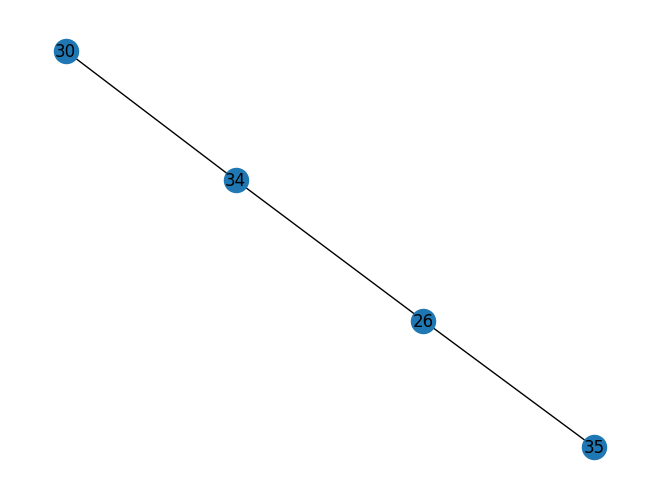

Performing global features query
Done with edge_df: 0.00099945068359375
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  34     59.64    5.090452               0.064878              0.000351   
1  26  35     25.87   27.839748               0.261893              0.000099   
2  30  34     52.20   10.792243               0.114391              0.000351   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       True                          None  
1                2                      False                          None  
2                1                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   27.839748               0.261893              0.

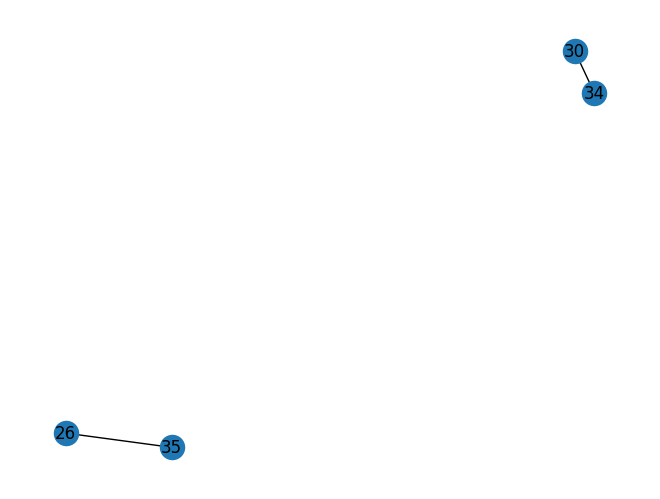

Performing node features query
Done with edge_df: 0.0008623600006103516
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   27.839748               0.261893              0.000099   
1  30  34     52.20   10.792243               0.114391              0.000351   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                      False                          None   
1                1                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   27.839748               0.261893              0.000099   
1  30  34     52.20   10.792243               0.114391             

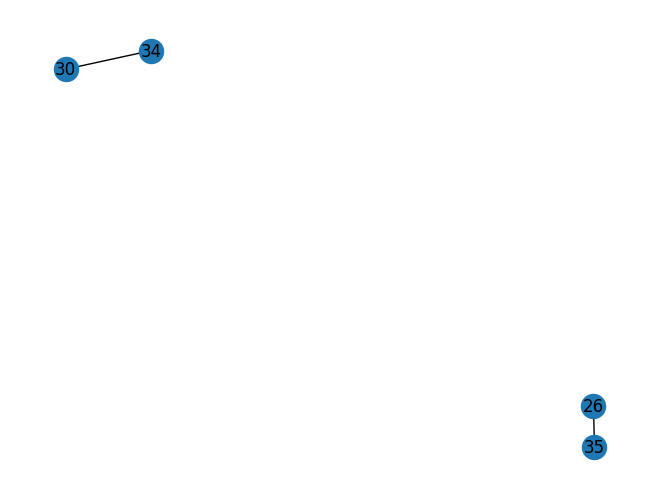

for upstream node 35, winning_node = 26, error_branches = [30 34]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (82.42468808628384) less than width_min(250)
Current node skip distance was 1691.3673013586972 but max skip distance was 1691.3673013586972
Current node skip distance was 1623.6893897676364 but max skip distance was 1687.839175191355
Current node skip distance was 1465.4945829272474 but max skip distance was 1465.4945829272474
Current node skip distance was 1455.9870844894756 but max skip distance was 1455.9870844894756
Current node skip distance was 1481.2995057656967 but max skip distance was 1984.9612954630368
Current node skip distance was 1813.4803846950622 but max skip distance was 1813.4803846950622
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.001993417739868164
Performing Edge Query
After edge filter, # of ro

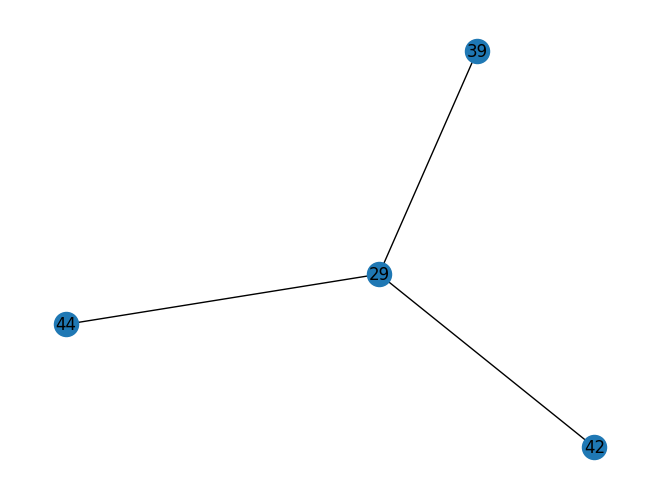

Performing global features query
Done with edge_df: 0.0008304119110107422
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17   43.247898               0.523074              0.000000   
1  29  42     38.61   13.243354               0.160176              0.000033   
2  29  44     33.11   72.555038               0.467388              0.000352   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                1                       None                          None  
2                2                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17   43.247898               0.523074              

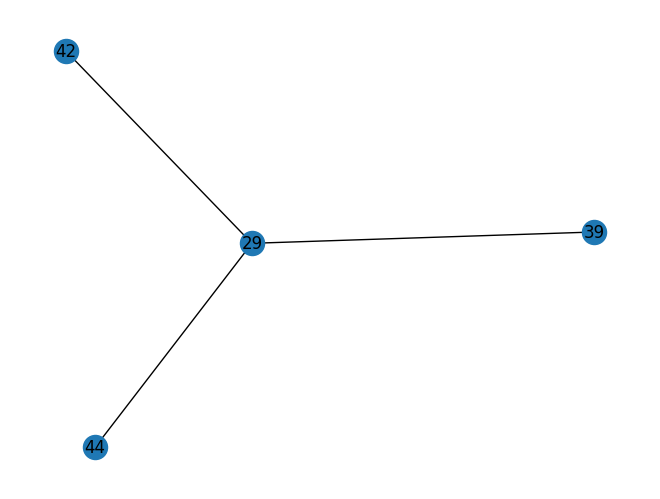

Performing node features query
Done with edge_df: 0.0008652210235595703
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17   43.247898               0.523074              0.000000   
1  29  42     38.61   13.243354               0.160176              0.000033   
2  29  44     33.11   72.555038               0.467388              0.000352   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                1                       None                          None   
2                2                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_di

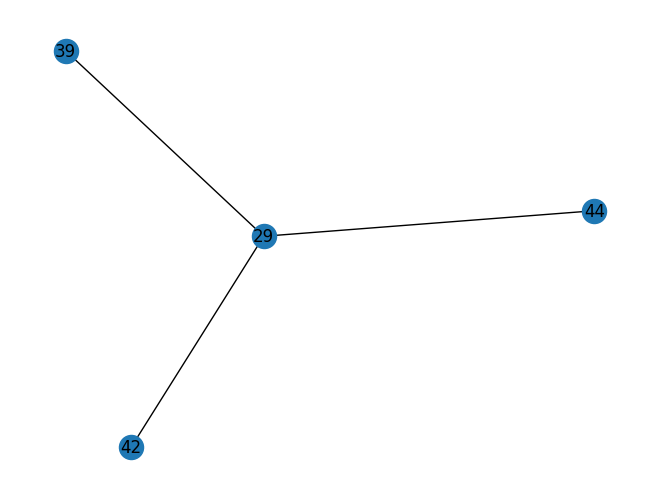

for upstream node 44, winning_node = None, error_branches = [29 39 42]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1407.2364002485333 but max skip distance was 1407.2364002485333
Current node skip distance was 1437.4230453052987 but max skip distance was 1437.4230453052987
Current node skip distance was 1697.3244725786685 but max skip distance was 1878.5918297262767
Current node skip distance was 1533.0819962936434 but max skip distance was 1533.0819962936434
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1759.9527762328148 but max skip distance was 1759.9527762328148
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1983.9878891513208 but max skip distance was 2016.3691093054942
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1490.7851567970627 but max skip 

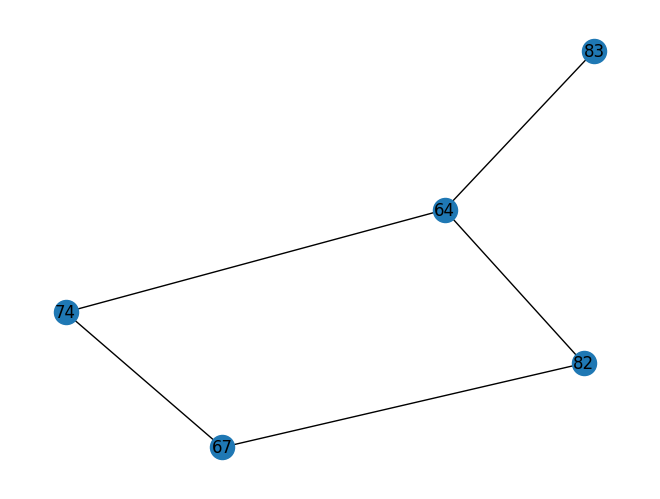

Performing global features query
Done with edge_df: 0.0008392333984375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  64  82     27.25   16.601337               0.289888              0.000162   
1  64  83     32.69   16.499398               0.288108              0.000251   
2  64  74     36.69    7.029244               0.109324              0.000251   
3  67  82     25.44    3.459579               0.044738              0.000015   
4  67  74     26.27   13.031672               0.202678              0.000074   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                4                       None                          None  
1                2                       None                          None  
2                2                       None                          None  
3          

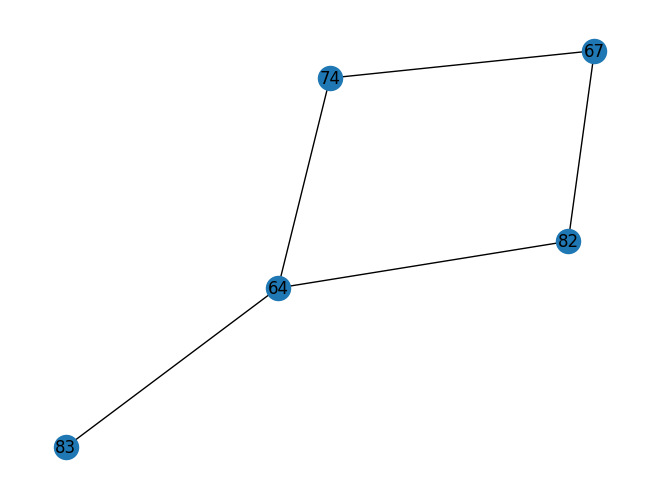

Performing node features query
Done with edge_df: 0.0010542869567871094
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  64  82     27.25   16.601337               0.289888              0.000162   
1  64  83     32.69   16.499398               0.288108              0.000251   
2  64  74     36.69    7.029244               0.109324              0.000251   
3  67  82     25.44    3.459579               0.044738              0.000015   
4  67  74     26.27   13.031672               0.202678              0.000074   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                4                       None                          None   
1                2                       None                          None   
2                2                       None                          None   
3       

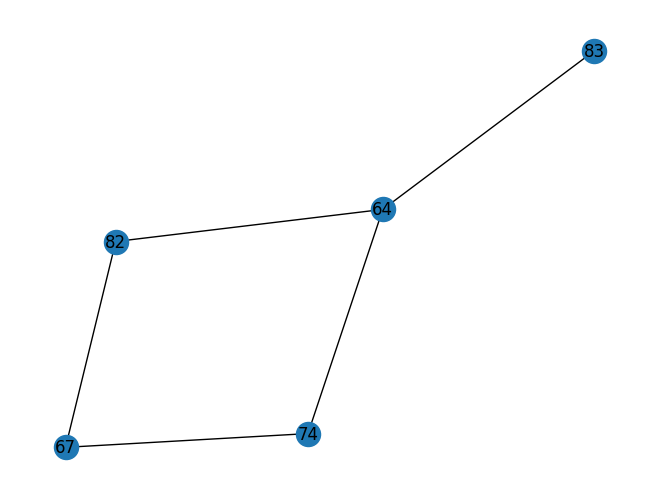

for upstream node 74, winning_node = None, error_branches = [64 67 82 83]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1653.4313163628099 but max skip distance was 1715.708392446817
Current node skip distance was 1477.6014975110577 but max skip distance was 1764.6762140111232
Current node skip distance was 1436.6213580418726 but max skip distance was 1519.4828706434616
Current node skip distance was 1946.1341577463722 but max skip distance was 2300.0
Current node skip distance was 1994.7372541540033 but max skip distance was 1995.4854816797333
Current node skip distance was 1474.4560454204889 but max skip distance was 1474.4560454204889
Current node skip distance was 1426.0405352467783 but max skip distance was 1904.2116298581204
Current node skip distance was 2022.9099410075357 but max skip distance was 2222.978535593952
Current node skip distance was 1811.005602659488 but max skip distance was 2300.0
Current n

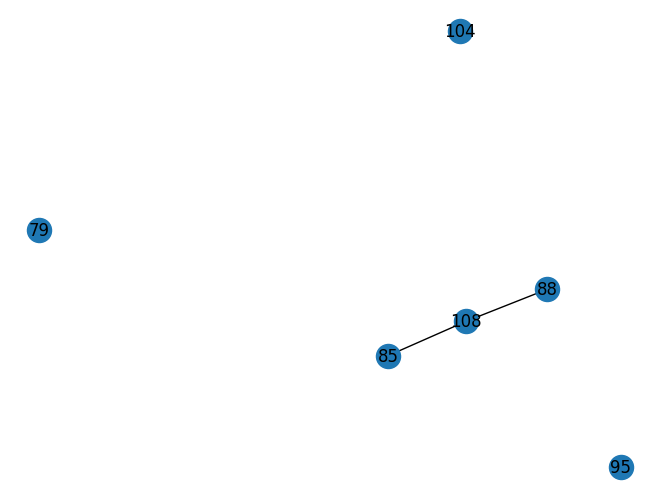

Performing global features query
Done with edge_df: 0.0008218288421630859
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   58.508441                0.38261              0.000253   
1  88  108     17.56   90.146058                0.58950              0.000482   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                3                        True                          None  
1                1                       False                          None  
Afer Global query: 
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  108     17.56   90.146058                 0.5895              0.000482   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                1                       False            

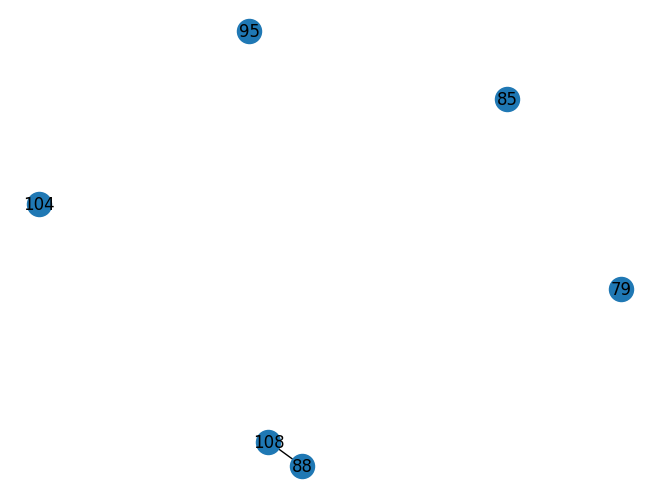

Performing node features query
Done with edge_df: 0.0007796287536621094
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  108     17.56   90.146058                 0.5895              0.000482   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                1                       False                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  108     17.56   90.146058                 0.5895              0.000482   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                1                       False                          None   

  above_threshold_delete  
0                   None  


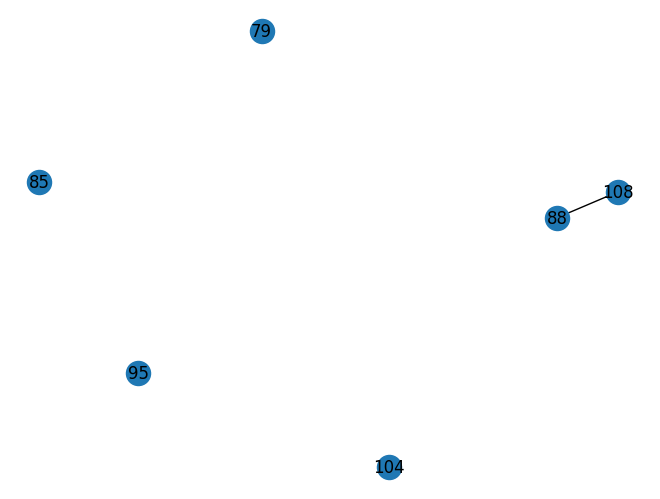

for upstream node 108, winning_node = 88, error_branches = [ 79  85  95 104]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1510.8185578822008 but max skip distance was 1510.8185578822008
Current node skip distance was 1458.786587331158 but max skip distance was 1458.786587331158
Current node skip distance was 1770.8640452267325 but max skip distance was 1803.8310592164503
Current node skip distance was 1768.7998725939756 but max skip distance was 2300.0
Current node skip distance was 1524.7183684680458 but max skip distance was 1524.7183684680458
Current node skip distance was 1412.149294862041 but max skip distance was 2044.602257528892
Current node skip distance was 1960.9148168013344 but max skip distance was 1960.9148168013344
Current node skip distance was 2157.6332756162074 but max skip distance was 2157.6332756162074
Current node skip distance was 1602.8621560881274 but max skip distance was 

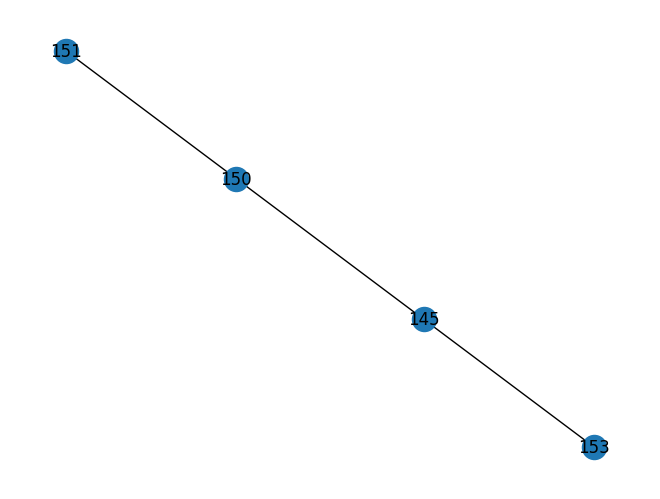

Performing global features query
Done with edge_df: 0.0008366107940673828
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  150     51.68   66.786927               0.775086   
1  145  153     26.01   34.278175               0.397810   
2  150  151     28.18   61.844585               0.678794   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000132                1                       True   
1              0.000160                4                      False   
2              0.000037                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175               0.397810   

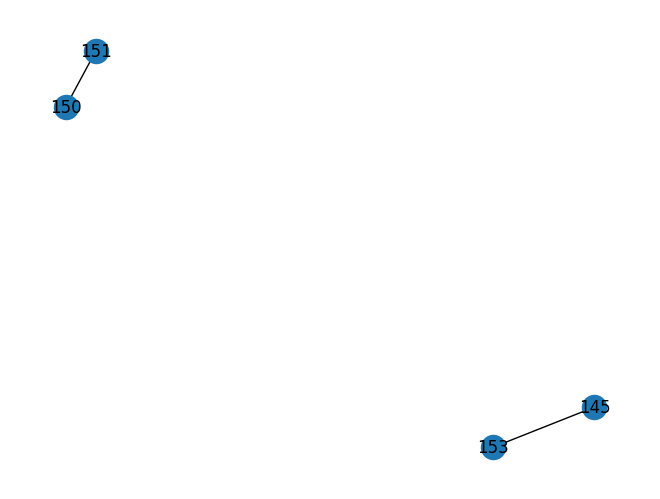

Performing node features query
Done with edge_df: 0.0009319782257080078
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175               0.397810   
1  150  151     28.18   61.844585               0.678794   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000160                4                      False   
1              0.000037                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175               0.397810   
1  150  151     28.18   61.844585               0.678794   

   synapse_density_diff  n_synapses_diff

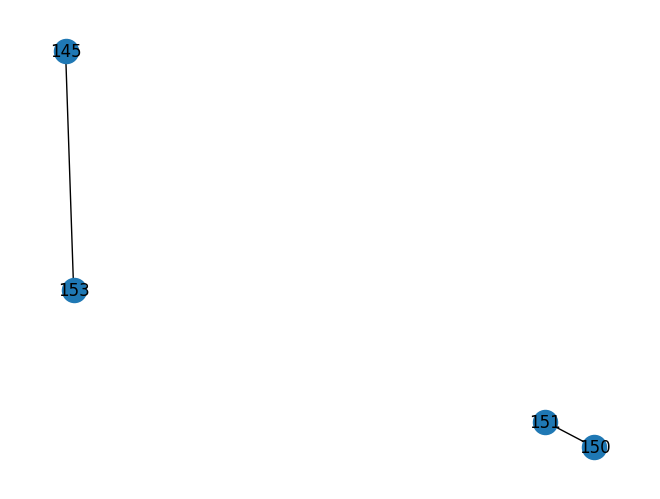

for upstream node 151, winning_node = 150, error_branches = [145 153]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (152.9540539023924) less than width_min(250)
Current node skip distance was 1507.9980597459078 but max skip distance was 1818.3021135800818
Current node skip distance was 1668.5220917782256 but max skip distance was 1668.5220917782256
Current node skip distance was 1754.8129272422311 but max skip distance was 2047.7133432664607
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0017666816711425781
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  150     51.68   66.786927               0.775086   
1  145  153     26.01   34.278175               0.397810   
2  145  154    120.63  

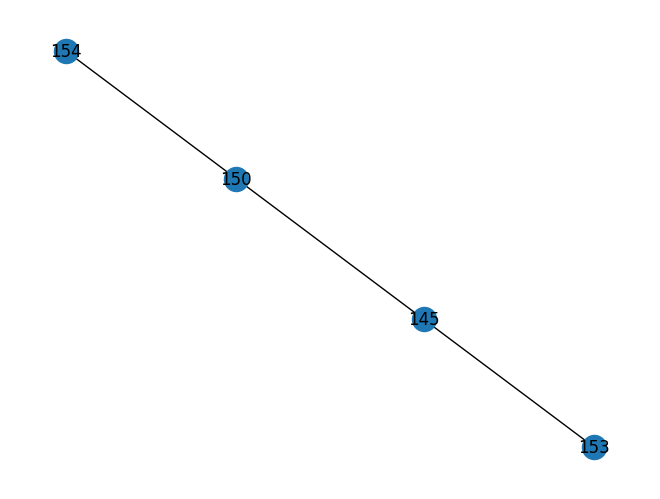

Performing global features query
Done with edge_df: 0.0008242130279541016
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  150     51.68   66.786927               0.775086   
1  145  153     26.01   34.278175               0.397810   
2  150  154      8.79   66.793767               0.775227   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000132                1                        True   
1              0.000160                4                       False   
2              0.000029                1                       False   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175               0.39781

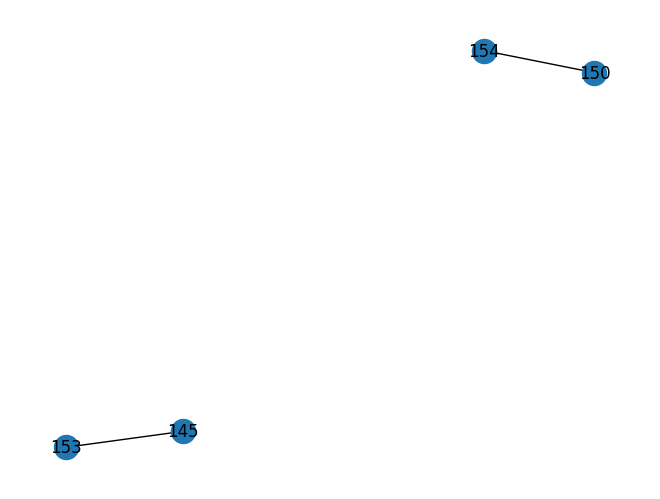

Performing node features query
Done with edge_df: 0.0009388923645019531
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175               0.397810   
1  150  154      8.79   66.793767               0.775227   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000160                4                       False   
1              0.000029                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175               0.397810   
1  150  154      8.79   66.793767               0.775227   

   synapse_density_diff  n_synapses_d

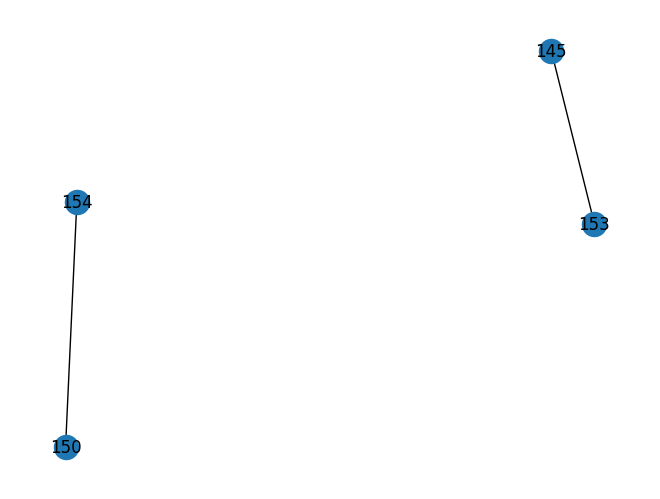

for upstream node 154, winning_node = 150, error_branches = [145 153]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (152.9540539023924) less than width_min(250)
Current node skip distance was 1490.1516303059093 but max skip distance was 1490.1516303059093
Current node skip distance was 2004.6812218672449 but max skip distance was 2300.0
Current node skip distance was 1516.2782876625906 but max skip distance was 1516.2782876625906
Current node skip distance was 1665.2211879459921 but max skip distance was 1665.2211879459921
Current node skip distance was 1654.83478646012 but max skip distance was 1859.441345211907
Current node skip distance was 1471.5851631431447 but max skip distance was 1508.9514036945973
Current node skip distance was 1537.8446294301966 but max skip distance was 1920.4074688624878
Current node skip distance was 1693.3042837882767 but max skip distance was 1693.3042837882767
Current node skip distance was 1920.4074688624878 but max skip dist

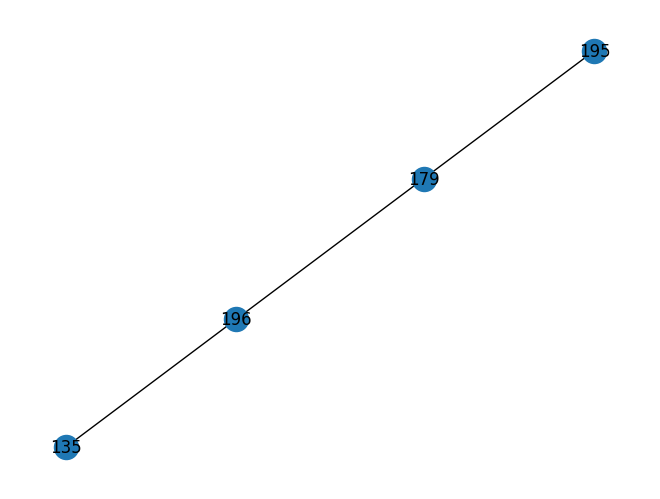

Performing global features query
Done with edge_df: 0.0008065700531005859
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   
2  196  179     64.03   12.284254               0.163567   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000079                2                      False   
1              0.000000                0                       None   
2              0.000000                0                       True   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   

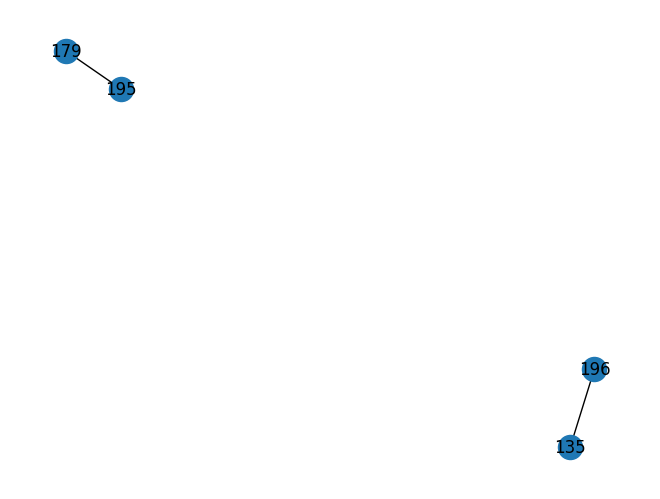

Performing node features query
Done with edge_df: 0.0007777214050292969
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000079                2                      False   
1              0.000000                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   

   synapse_density_diff  n_synapses_diff

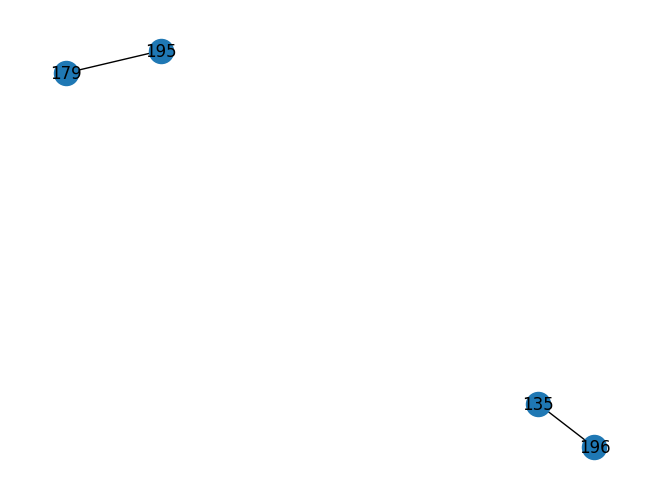

for upstream node 179, winning_node = 195, error_branches = [135 196]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (88.49933586232837) less than width_min(250)
Current node skip distance was 1469.3026492194927 but max skip distance was 1669.15941494473
Current node skip distance was 1936.9604794456363 but max skip distance was 1960.9148168013344
Current node skip distance was 2236.135131600633 but max skip distance was 2236.135131600633
Current node skip distance was 1580.9466653443449 but max skip distance was 1580.9466653443449
Current node skip distance was 1475.5326438941484 but max skip distance was 1475.5326438941484
Current node skip distance was 1441.1471058711568 but max skip distance was 1441.1471058711568
Current node skip distance was 1520.4017960156887 but max skip distance was 2112.668009582989
Current node skip distance was 1759.4129353208561 but max skip distance was 1759.4129353208561
Current node skip distance was 1471.4291591100111 but max

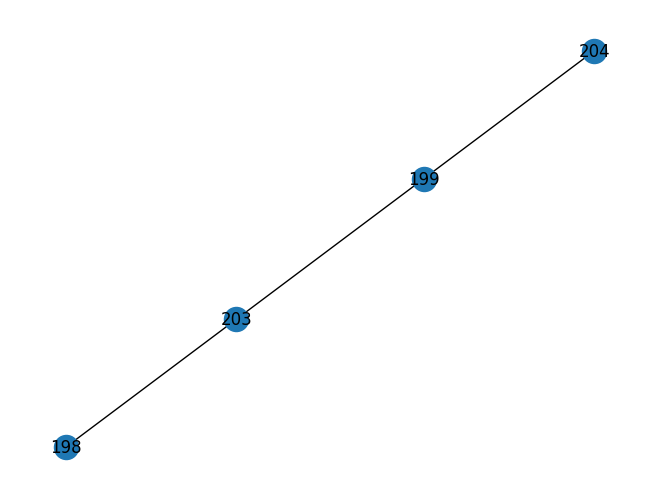

Performing global features query
Done with edge_df: 0.0008435249328613281
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   83.402339               0.509667   
1  199  204     26.38   16.284658               0.196651   
2  199  203     59.48   80.831036               0.493954   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000086                4                       False   
1              0.000175                2                       False   
2              0.000144                1                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   83.402339               0.50966

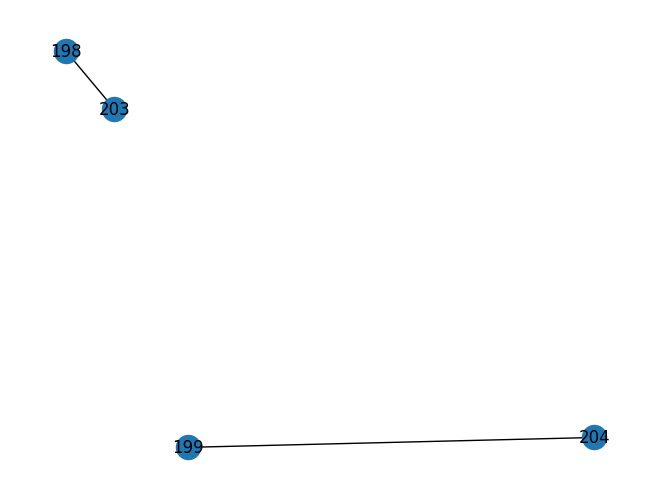

Performing node features query
Done with edge_df: 0.0008358955383300781
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   83.402339               0.509667   
1  199  204     26.38   16.284658               0.196651   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000086                4                       False   
1              0.000175                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   83.402339               0.509667   
1  199  204     26.38   16.284658               0.196651   

   synapse_density_diff  n_synapses_d

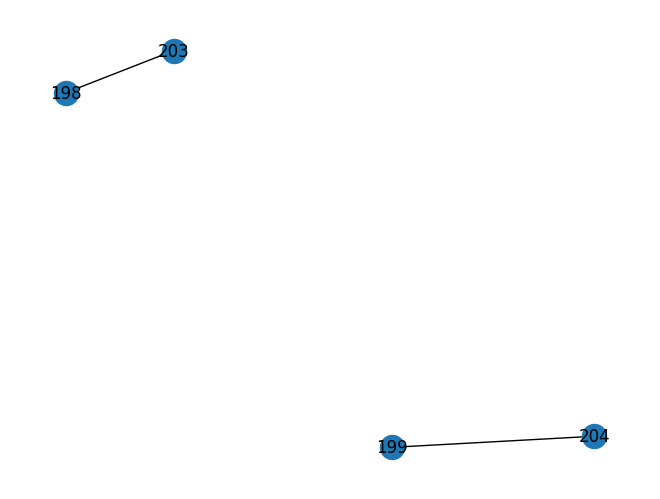

for upstream node 203, winning_node = 198, error_branches = [199 204]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (112.310866119622) less than width_min(250)
Current node skip distance was 1443.854790039841 but max skip distance was 1443.854790039841
Current node skip distance was 1506.252005449707 but max skip distance was 2300.0
Current node skip distance was 1798.2531760095058 but max skip distance was 1798.2531760095058
Current node skip distance was 1536.1693446150296 but max skip distance was 1536.1693446150296
Current node skip distance was 1780.4587744781402 but max skip distance was 1780.4587744781402
Current node skip distance was 1590.876460916061 but max skip distance was 1590.876460916061
Current node skip distance was 1848.1574702969704 but max skip distance was 1936.009738559324
Current node skip distance was 1988.9099826139286 but max skip distance was 1988.9099826139286
Current node skip distance was 1729.5597987773695 but max skip distance

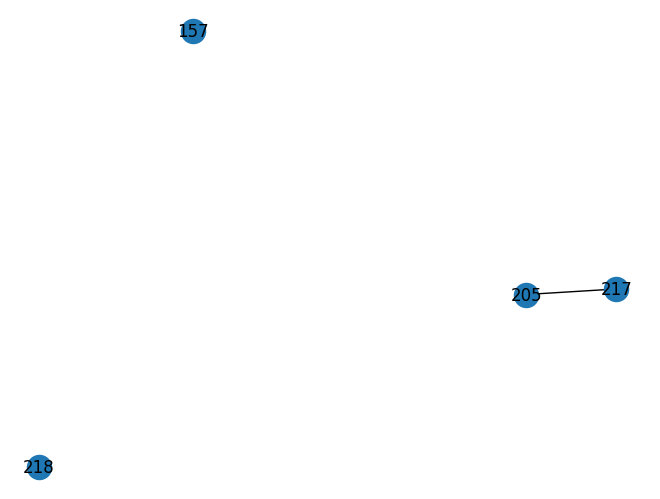

Performing global features query
Done with edge_df: 0.0007815361022949219
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete  
0                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete  
0                          False  


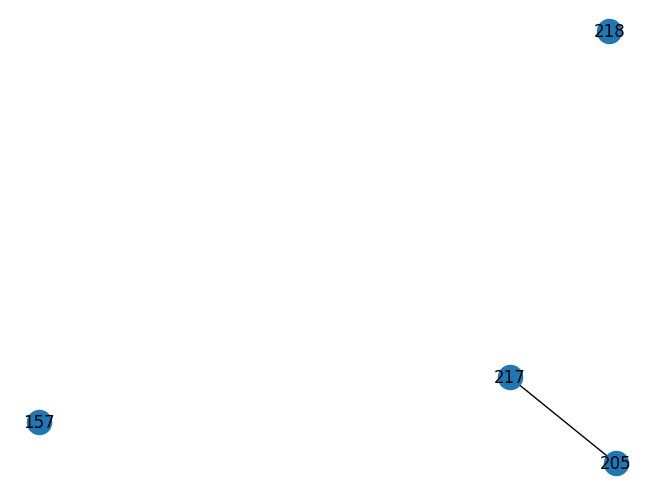

Performing node features query
Done with edge_df: 0.00075531005859375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  


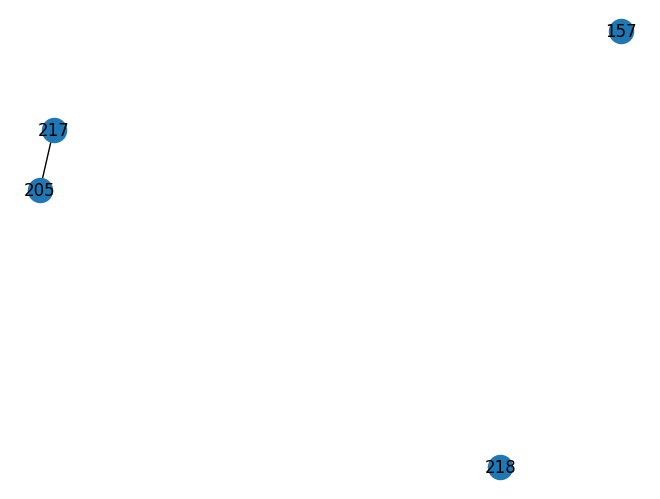

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1792.7829279715936 but max skip distance was 1848.5035166199302
Current node skip distance was 1662.4847643852409 but max skip distance was 2212.423557991369
Current node skip distance was 1890.1167904125427 but max skip distance was 2102.97806318274
Current node skip distance was 1800.4908031559103 but max skip distance was 1800.4908031559103
Current node skip distance was 1852.568578184967 but max skip distance was 1852.568578184967
Current node skip distance was 1480.8555465104162 but max skip distance was 1852.568578184967
Current node skip distance was 2245.0556786352363 but max skip distance was 2245.0556786352363
Current node skip distance was 1739.262976609458 but max skip distance was 1830.9796473087345
Current node skip distance was 1497.6505440835213 but max skip distance was 1739.262976609458
Current node skip distance was 1582.9510706946508 but max skip d

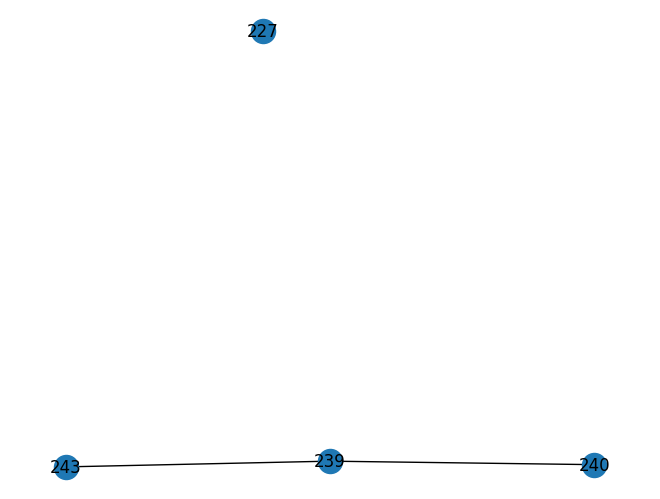

Performing global features query
Done with edge_df: 0.0007655620574951172
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  239  240     37.32   26.008843               0.234233   
1  239  243     13.82   38.368690               0.527989   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                3                       None   
1              0.000213                4                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  239  240     37.32   26.008843               0.234233   
1  239  243     13.82   38.368690               0.527989   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029         

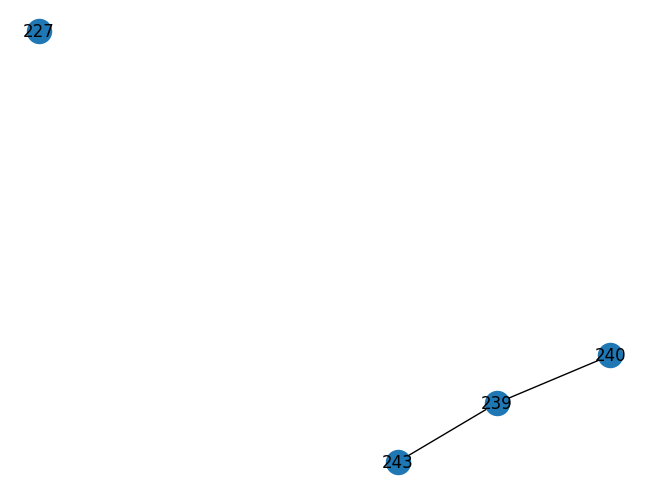

Performing node features query
Done with edge_df: 0.0008158683776855469
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  239  240     37.32   26.008843               0.234233   
1  239  243     13.82   38.368690               0.527989   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                3                       None   
1              0.000213                4                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  239  240     37.32   26.008843               0.234233   
1  239  243     13.82   38.368690               0.527989   

   synapse_density_diff  n_synapses_diff

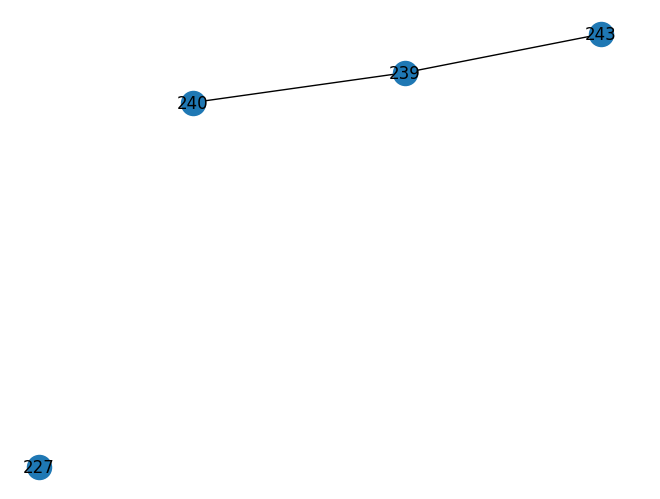

for upstream node 243, winning_node = None, error_branches = [227 239 240]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1456.5455709092707 but max skip distance was 1932.3063800636153
Current node skip distance was 1463.5199287555183 but max skip distance was 1463.5199287555183
Current node skip distance was 1675.6082062828614 but max skip distance was 1675.6082062828614
Current node skip distance was 1856.580010317257 but max skip distance was 1856.580010317257
Current node skip distance was 1906.9262226224132 but max skip distance was 1906.9262226224132
Current node skip distance was 2102.97806318274 but max skip distance was 2102.97806318274
Current node skip distance was 1835.327625713191 but max skip distance was 1843.8109690930505
Current node skip distance was 1993.2119132166135 but max skip distance was 2034.206051846453
Current node skip distance was 1808.913939920237 but max skip distance was 1963.7696

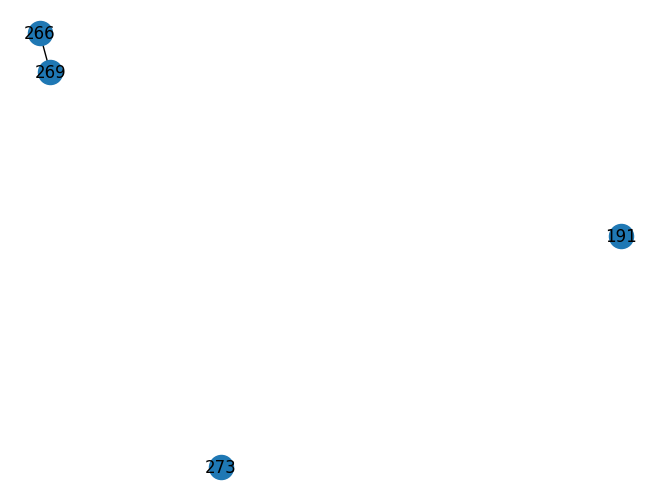

Performing global features query
Done with edge_df: 0.0007646083831787109
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000388                2                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000388                2                       False   

  definite_partner_width_delete  
0                          None  


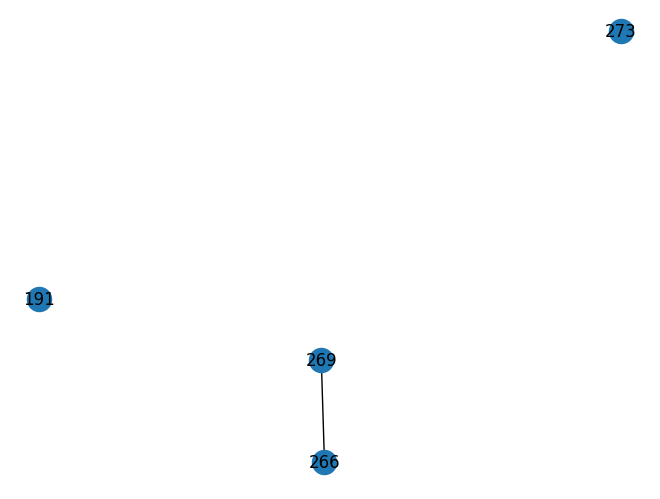

Performing node features query
Done with edge_df: 0.0007395744323730469
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000388                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000388                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


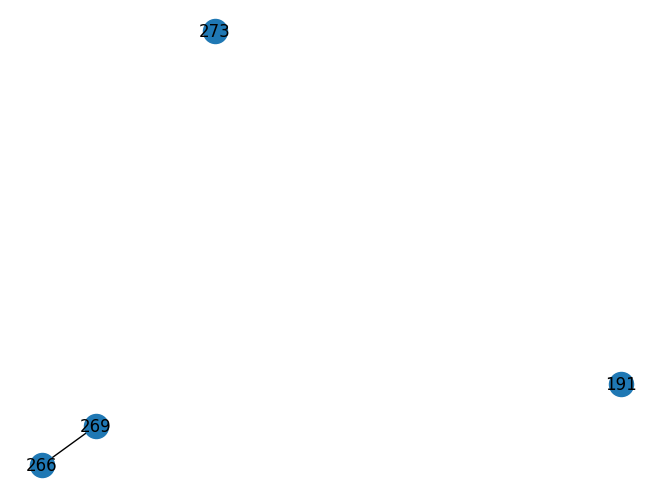

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2086.708888809626 but max skip distance was 2165.6546601796394
Current node skip distance was 2075.894362526472 but max skip distance was 2075.894362526472
Current node skip distance was 2165.6546601796394 but max skip distance was 2165.6546601796394
Current node skip distance was 1864.25330271235 but max skip distance was 1979.3255921928808
Current node skip distance was 1971.1845264032954 but max skip distance was 1971.1845264032954
Current node skip distance was 1700.2972194863037 but max skip distance was 2258.6800200582575
Current node skip distance was 1726.9258802896245 but max skip distance was 2073.640813765174
Current node skip distance was 1961.4153839940934 but max skip distance was 2024.380261078134
Current node skip distance was 2298.921030871111 but max skip distance was 2298.921030871111
Current node skip distance was 1422.8191216850398 but max skip di

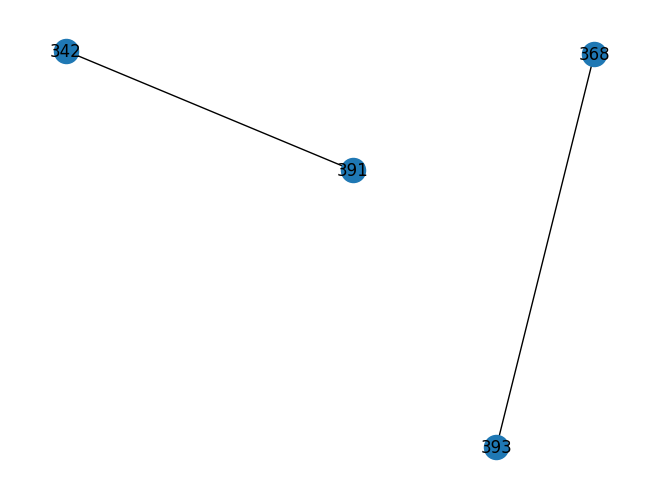

Performing global features query
Done with edge_df: 0.0007448196411132812
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056                1                      False   
1              0.000431                2                       None   

   definite_partner_width_delete  
0                          False  
1                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056      

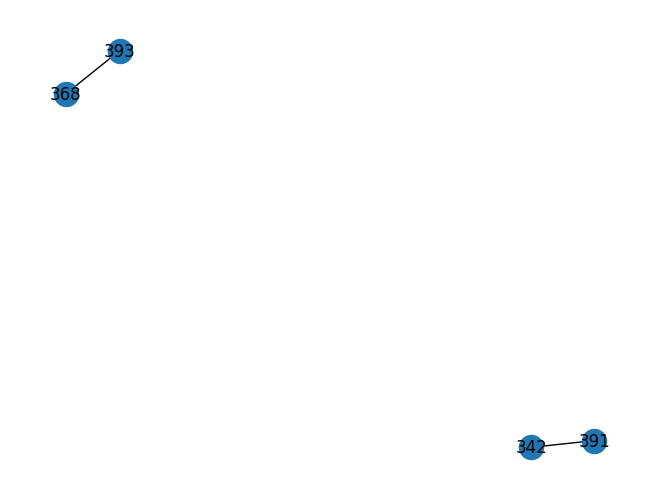

Performing node features query
Done with edge_df: 0.00096893310546875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056                1                      False   
1              0.000431                2                       None   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
1                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_dif

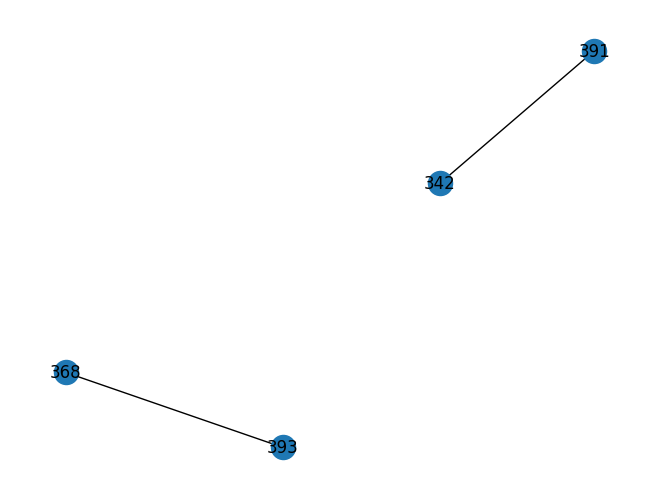

for upstream node 342, winning_node = 391, error_branches = [368 393]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (181.81578649690547) less than width_min(250)
Current node skip distance was 1857.9482625419403 but max skip distance was 1857.9482625419403
Current node skip distance was 2032.1280681062717 but max skip distance was 2045.7593757531026
Current node skip distance was 1723.0631465697677 but max skip distance was 2060.1060158328014
Current node skip distance was 1827.7906452133693 but max skip distance was 2226.881251855768
Current node skip distance was 1970.0153273419096 but max skip distance was 1970.0153273419096
Current node skip distance was 1820.6045623023558 but max skip distance was 1891.6317265224088
Current node skip distance was 2000.0150089779318 but max skip distance was 2296.284725981935
Current node skip distance was 1517.477557849377 but max skip distance was 2097.624796409483
branch_match_query = :
(((width_diff < 75) or (width_di

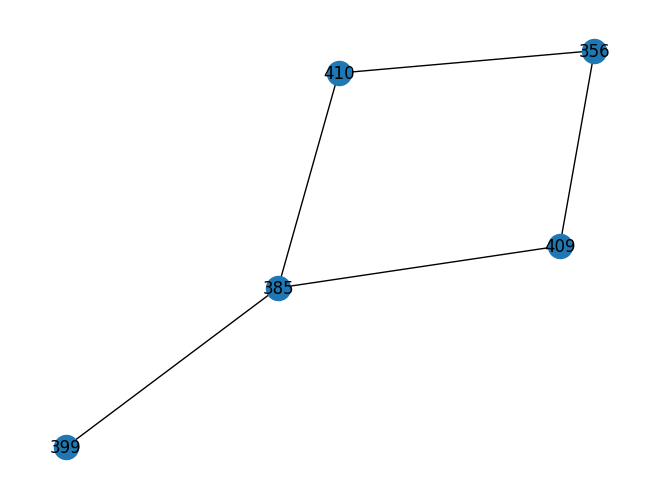

Performing global features query
Done with edge_df: 0.0008890628814697266
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  385  399     58.13   13.603553               0.216860   
1  385  409     30.64    0.065958               0.001051   
2  385  410     41.34   14.061745               0.224164   
3  409  356      8.45   21.530796               0.255727   
4  410  356     23.90    7.403093               0.087928   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000114                2                       None   
1              0.000153                3                       None   
2              0.000010                1                       None   
3              0.000137                3                       None   
4              0.000027                1                       None   

  definite_pa

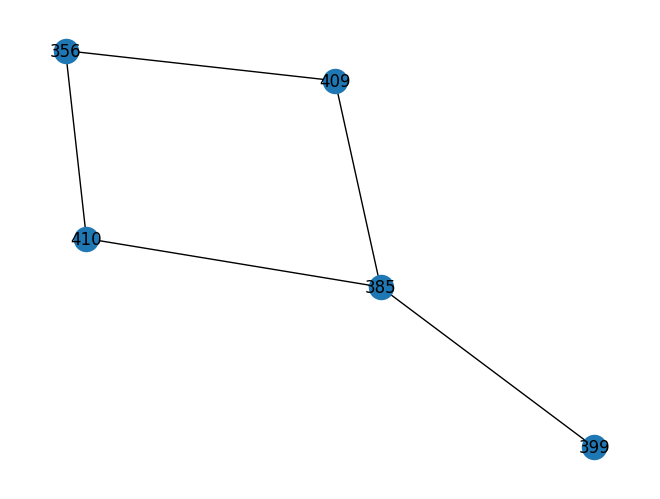

Performing node features query
Done with edge_df: 0.0009214878082275391
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  385  399     58.13   13.603553               0.216860   
1  385  409     30.64    0.065958               0.001051   
2  385  410     41.34   14.061745               0.224164   
3  409  356      8.45   21.530796               0.255727   
4  410  356     23.90    7.403093               0.087928   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000114                2                       None   
1              0.000153                3                       None   
2              0.000010                1                       None   
3              0.000137                3                       None   
4              0.000027                1                       None   

  definite_partne

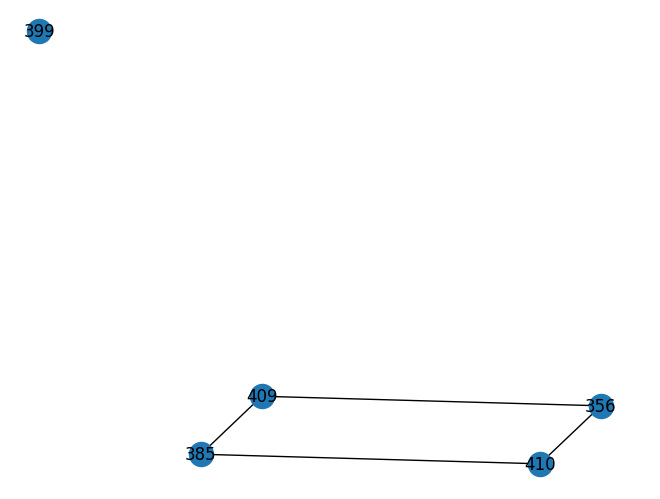

for upstream node 356, winning_node = None, error_branches = [385 399 409 410]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1398.9948611815746 but max skip distance was 1398.9948611815746
Current node skip distance was 1897.2302923052882 but max skip distance was 1897.2302923052882
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1679.9236194990835 but max skip distance was 1679.9236194990835
Current node skip distance was 1791.170407213397 but max skip distance was 2300.0
Current node skip distance was 1429.9280946346803 but max skip distance was 1429.9280946346803
Current node skip distance was 1453.4280808679287 but max skip distance was 1453.4280808679287
Current node skip distance was 1475.9217580922184 but max skip distance was 2300.0
Current node skip distance was 1873.8585886753744 but max skip distance was 1873.8585886753744
Current node skip distance w

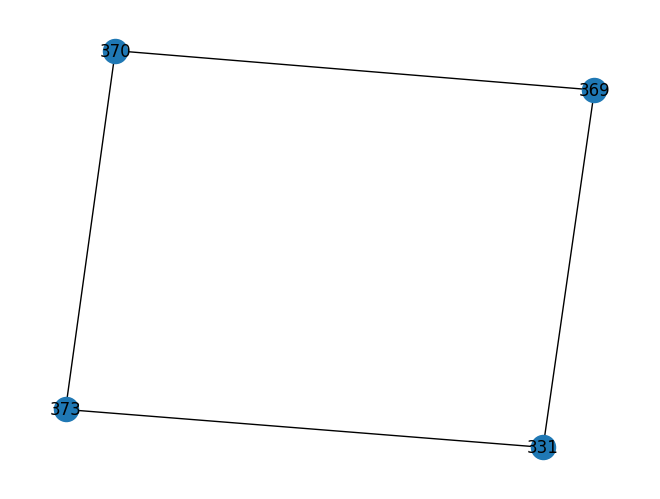

Performing global features query
Done with edge_df: 0.0009093284606933594
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  331  373     24.18   22.677958               0.225768   
1  331  369     27.75    7.316219               0.078558   
2  370  373     38.61   17.418399               0.182989   
3  370  369     24.06    2.056659               0.022083   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000015                1                       None   
1              0.000140                0                       None   
2              0.000062                1                       None   
3              0.000093                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
3       

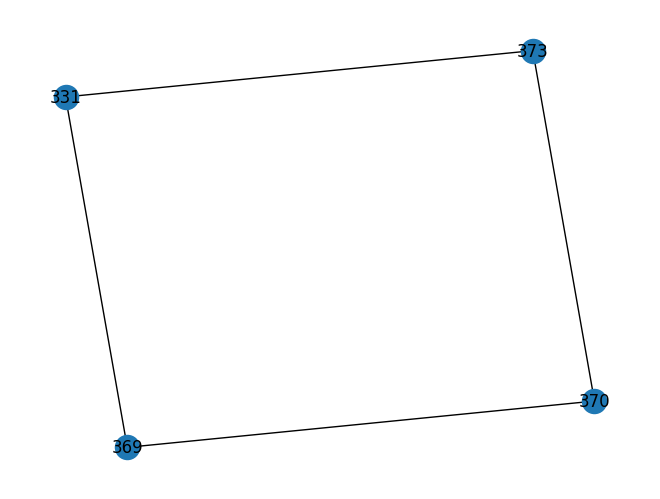

Performing node features query
Done with edge_df: 0.0008282661437988281
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  331  373     24.18   22.677958               0.225768   
1  331  369     27.75    7.316219               0.078558   
2  370  373     38.61   17.418399               0.182989   
3  370  369     24.06    2.056659               0.022083   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000015                1                       None   
1              0.000140                0                       None   
2              0.000062                1                       None   
3              0.000093                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None   

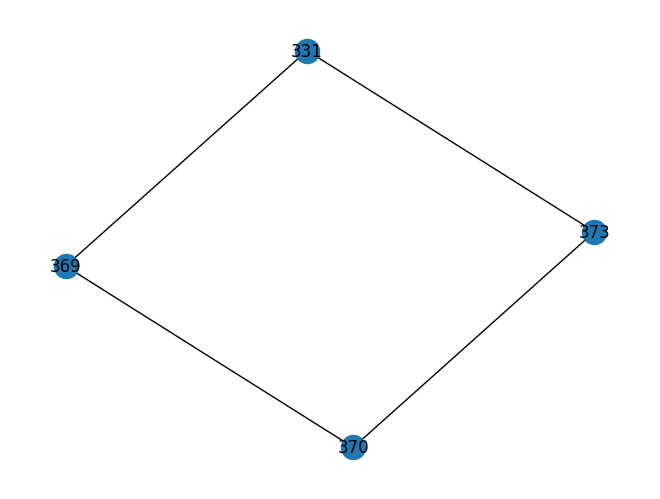

for upstream node 369, winning_node = None, error_branches = [331 370 373]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1883.8501019164719 but max skip distance was 1883.8501019164719
Current node skip distance was 1745.988538994956 but max skip distance was 1745.988538994956
Current node skip distance was 1490.708038892068 but max skip distance was 1542.7753192727068
Current node skip distance was 1558.385308835699 but max skip distance was 1745.988538994956
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.001745462417602539
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  336     85.72   51.534328               0.663692   
1  332  372     78

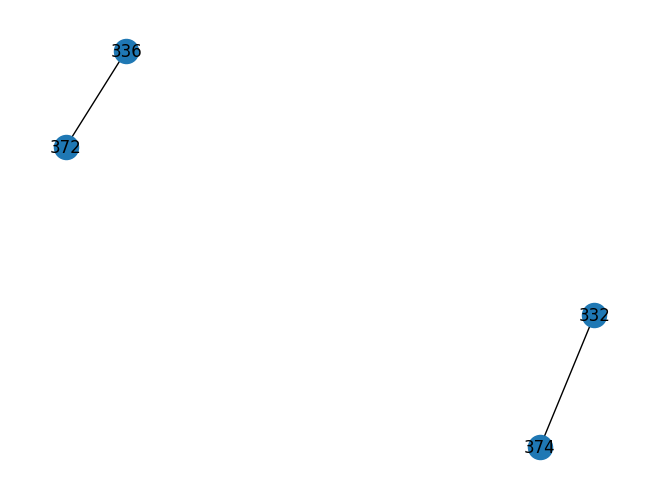

Performing global features query
Done with edge_df: 0.0008039474487304688
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24   16.364508               0.174067   
1  336  372     36.23    9.854956               0.076287   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097                1                       False   
1              0.000130               10                       False   

  definite_partner_width_delete  
0                          None  
1                         False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24   16.364508               0.174067   
1  336  372     36.23    9.854956               0.076287   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097     

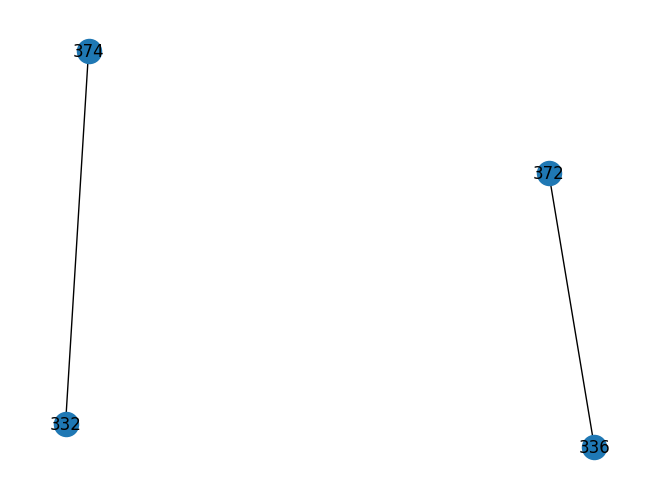

Performing node features query
Done with edge_df: 0.0008111000061035156
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24   16.364508               0.174067   
1  336  372     36.23    9.854956               0.076287   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097                1                       False   
1              0.000130               10                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                         False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24   16.364508               0.174067   
1  336  372     36.23    9.854956               0.076287   

   synapse_density_diff  n_synapses_d

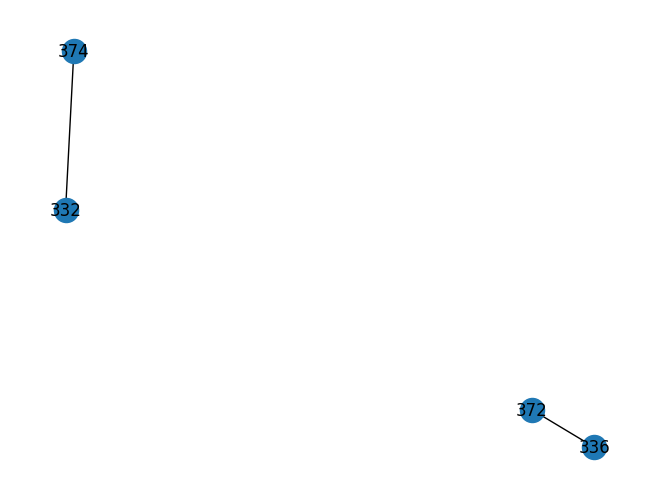

for upstream node 374, winning_node = 332, error_branches = [336 372]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (77.64796574259381) less than width_min(250)
Current node skip distance was 1824.259398723258 but max skip distance was 2221.475821813151
Current node skip distance was 2045.7593757531026 but max skip distance was 2045.7593757531026
Current node skip distance was 1921.1451543970088 but max skip distance was 1921.1451543970088
Current node skip distance was 2044.0212198266472 but max skip distance was 2044.0212198266472
Current node skip distance was 2025.6025728108746 but max skip distance was 2300.0
Current node skip distance was 1520.866259025121 but max skip distance was 1619.9583630901523
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0012235641479492188
Performing Edge Query
After edge filter, # of rows = 3
Ex

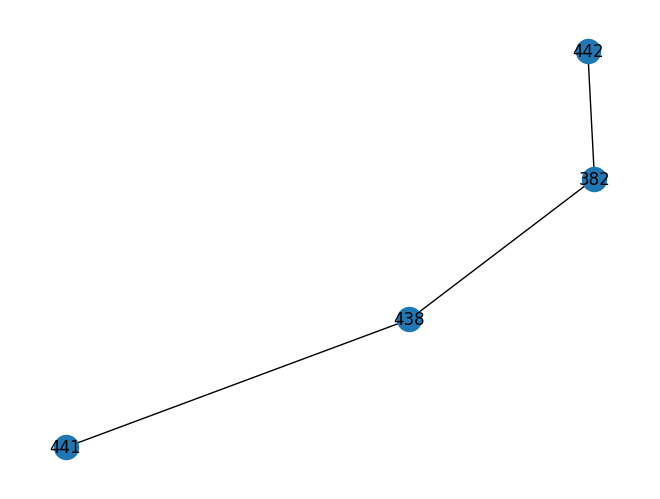

Performing global features query
Done with edge_df: 0.0007851123809814453
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   12.369503               0.186106   
1  438  382     46.16   18.543103               0.218134   
2  442  382     25.40   23.782105               0.279763   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000070                3                      False   
1              0.000004                1                       True   
2              0.000049                3                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   12.369503               0.186106   

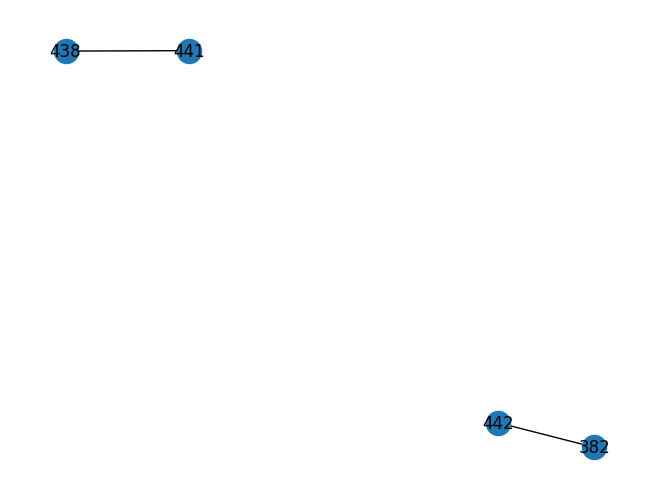

Performing node features query
Done with edge_df: 0.0008471012115478516
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   12.369503               0.186106   
1  442  382     25.40   23.782105               0.279763   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000070                3                      False   
1              0.000049                3                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   12.369503               0.186106   
1  442  382     25.40   23.782105               0.279763   

   synapse_density_diff  n_synapses_diff

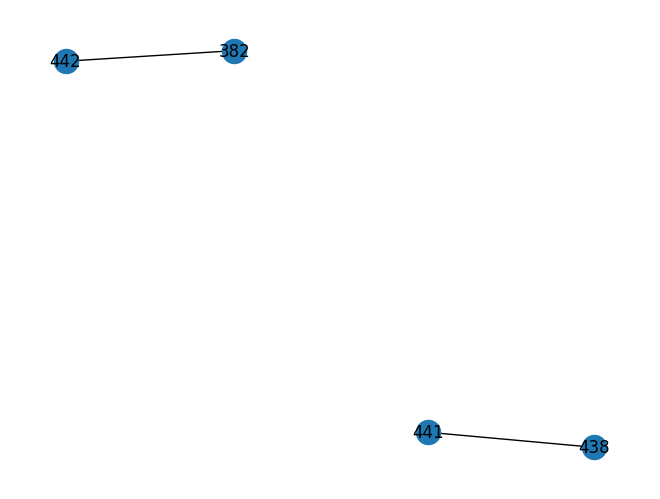

for upstream node 382, winning_node = 442, error_branches = [438 441]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (116.1121258385822) less than width_min(250)
Current node skip distance was 1542.7753192727068 but max skip distance was 1542.7753192727068
Current node skip distance was 1499.7325270056906 but max skip distance was 1499.7325270056906
Current node skip distance was 1428.0407321066473 but max skip distance was 1428.0407321066473
Current node skip distance was 1983.3865421239625 but max skip distance was 1983.3865421239625
Current node skip distance was 1906.784317756396 but max skip distance was 1906.784317756396
Current node skip distance was 1535.5603845696007 but max skip distance was 1535.5603845696007
Current node skip distance was 1924.2324437371053 but max skip distance was 1924.2324437371053
Current node skip distance was 1489.5075320461283 but max skip distance was 2235.389931936797
Current node skip distance was 1453.6175721877003 but m

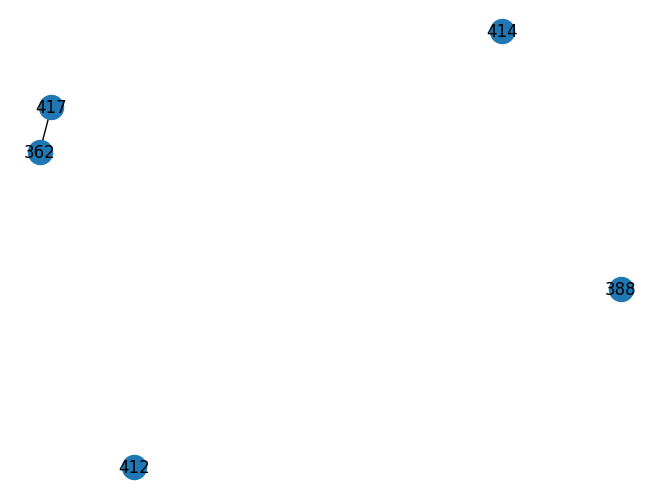

Performing global features query
Done with edge_df: 0.0007414817810058594
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete  
0                          None  


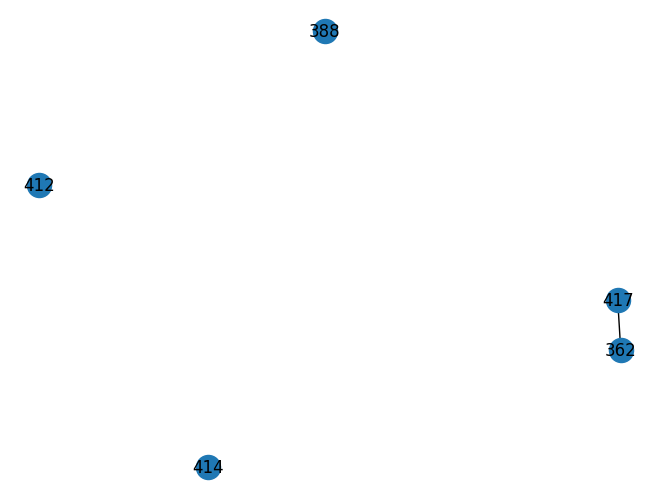

Performing node features query
Done with edge_df: 0.0007646083831787109
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


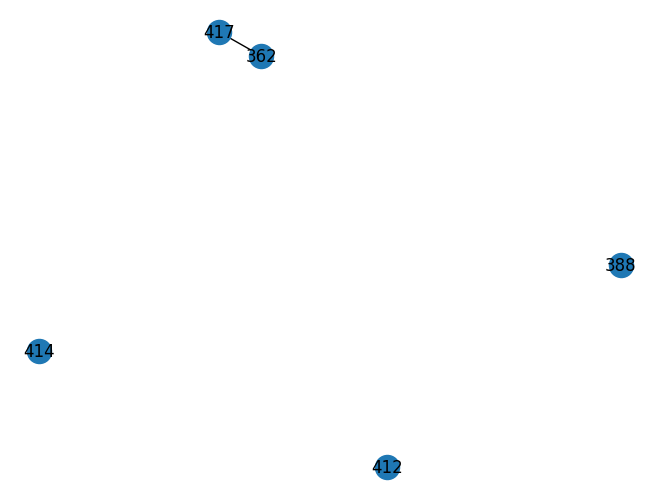

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1372.7275180208721 but max skip distance was 1493.7677241238655
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0012845993041992188
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  414    106.83    4.824315               0.076355   
1  362  417      2.53   15.321511               0.242495   
2  362  413    121.33   13.728138               0.277591   
3  414  417     75.61   20.145826               0.345209   
4  414  413    106.02    8.903823               0.180040   
5  417  413     58.41   29.049649               0.587400   

   synapse_density_diff  n_synapses_diff  
0              0.000068     

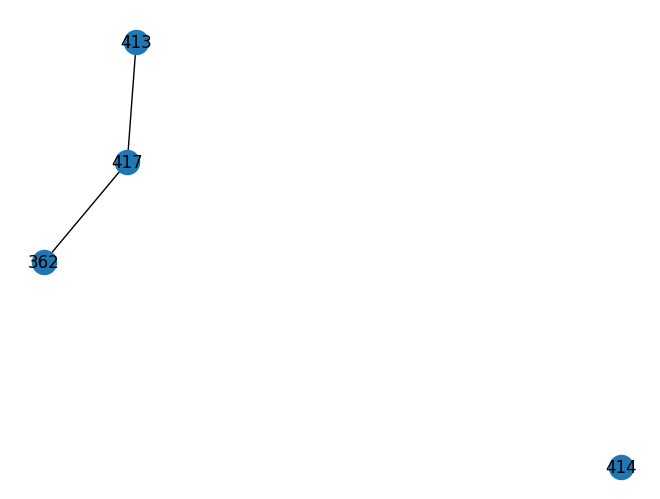

Performing global features query
Done with edge_df: 0.0008003711700439453
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   
1  417  413     58.41   29.049649               0.587400   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   
1              0.000051                1                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_part

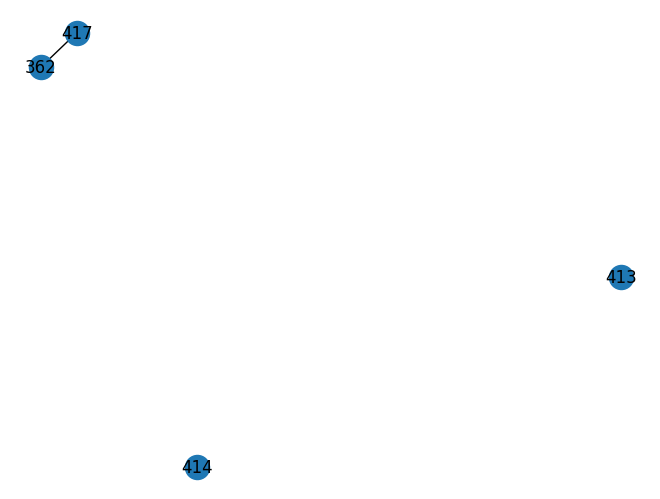

Performing node features query
Done with edge_df: 0.0007789134979248047
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


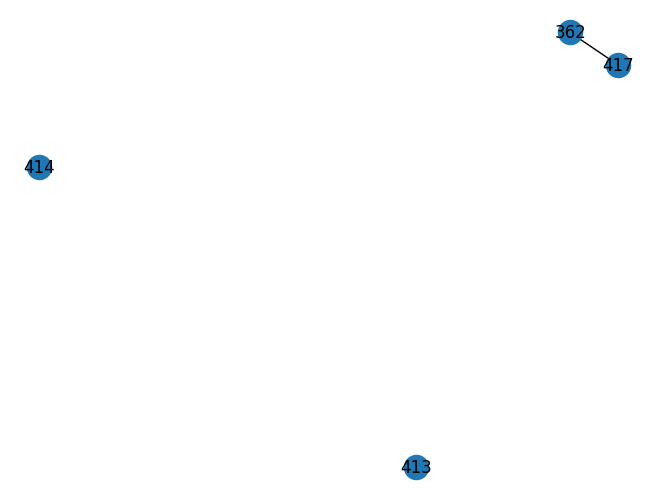

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1409.826781900253 but max skip distance was 1640.957054534685
Current node skip distance was 2019.0862723530136 but max skip distance was 2181.807145182185
Current node skip distance was 1493.7677241238655 but max skip distance was 1493.7677241238655
Current node skip distance was 1935.8157013742607 but max skip distance was 1979.6789576637198
Current node skip distance was 1797.726209129479 but max skip distance was 2222.579722388221
Current node skip distance was 1622.675197704673 but max skip distance was 1935.8157013742607
Current node skip distance was 1953.5991810979217 but max skip distance was 2019.0862723530136
Current node skip distance was 1543.0186166671774 but max skip distance was 1543.0186166671774
Current node skip distance was 1421.2907740917342 but max skip distance was 1421.2907740917342
Current node skip distance was 1892.3149310140766 but max skip

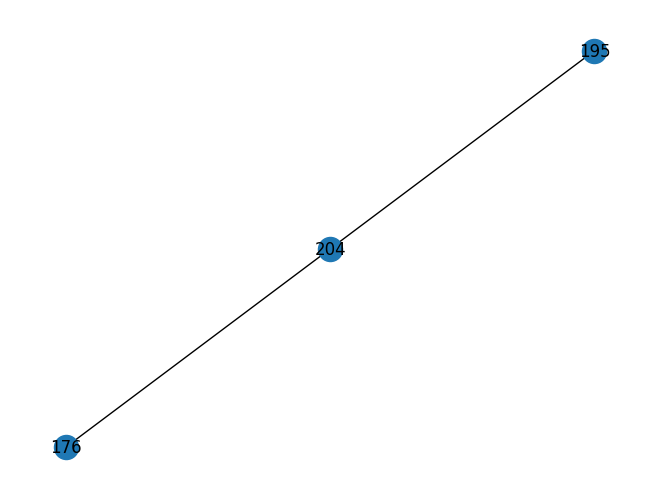

Performing global features query
Done with edge_df: 0.0007297992706298828
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  195  204     17.50    8.123767               0.087229   
1  204  176     47.35   80.899681               0.487619   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000089                3                       False   
1              0.000476                2                        True   

   definite_partner_width_delete  
0                          False  
1                           True  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  195  204      17.5    8.123767               0.087229   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000089                3                       False   

   definite_

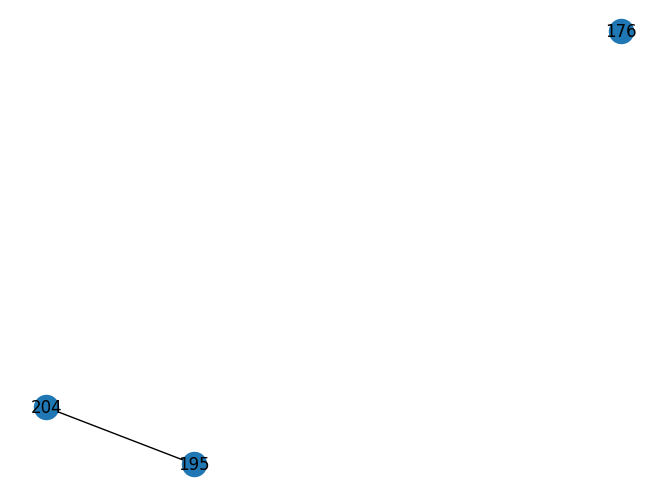

176 triggered axon_double_back_inh_filter
limb_branch_dict_to_cancel = {'L0': array([196, 166, 207, 210, 246, 247, 248, 249, 195, 204])}
width_max = 500
upstream_width_max = 500
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
N_branches on limbs before simplification
L0: 243
L1: 14
L2: 15
L3: 11
L4: 11
L5: 5
L6: 1
--- STARTING merge_floating_end_nodes_to_parent----



---N_branches on limbs AFTER merge_floating_end_nodes_to_parent---
L0: 243 (difference of 0)
L1: 14 (difference of 0)
L2: 15 (difference of 0)
L3: 11 (difference of 0)
L4: 11 (difference of 0)
L5: 5 (difference of 0)
L6: 1 (difference of 0)



--- STARTING COMBINING BRANCHES----



---N_branches on limbs AFTER combine_path_branches---
L0: 240 (difference of 3)
L1: 13 (difference of 1)
L2: 15 (difference of 0)
L3: 11 (difference of 0)
L4: 11 (difference of 0)
L5: 5 (difference of 0)
L6: 1 (difference of 0)



---N_branches on limbs AFTER total 

In [40]:
neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [41]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)

No skeletons to stack so returning empty list
No skeletons to stack so returning empty list

Working on compartment basal---
Compartment limb stats = {'n_limbs': 0, 'soma_angle_max': None, 'soma_angle_min': None}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 0, 'soma_angle_max': None, 'soma_angle_min': None}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 11.26, 'soma_angle_min': 11.26}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 6, 'soma_angle_max': 153.79, 'soma_angle_min': 25.1}


# Saving off the autoproofread neuron

In [42]:
neuron_obj_proof.neuron_graph_after_proof

In [43]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
)

Total time for soma meshes compression = 0.496809720993042
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.29836392402648926
Total time for limb_meshes compression = 1.6576950550079346
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 36.92410326004028
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:140008693814272
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:140008359890080
Total time for compression = 150.18698740005493


---Finished outputing neuron at location: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/864691135567721964_auto_proof---


'864691135567721964_auto_proof.pbz2'

# Plotting the final neuron

In [44]:
from neurd import synapse_utils as syu

In [45]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [ ]:
syu.plot_synapses(neuron_obj_proof)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [ ]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [ ]:
nviz.plot_compartments(neuron_obj_proof)